<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:26px 26px; border-radius:15px; font-size:40px;'><B>Show Up</B> for Health - Exploratory Analysis</div><span style='color: #273333; padding:26px 26px; font-size:11px;'> Powered by <B>AutoNote</B> | Jan du Plessis Notebook - <B>Exploratory Analysis</b></span><div style='margin:4px 26px; color:#273333; font-size:17px;'>
</div>

In [1]:
# Importing default Libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings

# Hi-resolution Plots and Matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Set the maximum number of rows and columns to be displayed
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
warnings.filterwarnings('ignore')

# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

In [65]:
data = pd.read_csv(f'{OUTPUT_DATA}full_train_data.csv')
data.head(3)

Appointment_status  temp  precipitation  Age  Sex  FRAILTY  DEPRESSION  \
0                   1  17.7            0.0   40    0     0.00           0   
1                   1  18.5            0.0   70    2     0.39           0   
2                   1  18.5            0.0   70    2     0.39           0   

   OBESITY  IHD  DM  HPT  NDHG  SMI  IMD2023  dist_to_station  \
0        0    0   0    0     0    0  22698.0         0.519419   
1        1    0   1    1     0    0  10169.0         0.540792   
2        1    0   1    1     0    0  10169.0         0.540792   

   distance_to_surg  book_to_app_days  booked_by_clinician  \
0          0.816996              54.0                    1   
1          1.656309              49.0                    0   
2          1.656309              49.0                    0   

   registered_for_months  sin_week  cos_week  sin_Appointment_time  \
0                   17.0 -0.120537 -0.992709              0.707107   
1                   12.0 -0.120537 -0.992709              0.500000   
2                   12.0 -0.120537 -0.992709              0.500000   

   cos_Appointment_time  sin_month  cos_month  sin_day_of_week  \
0             -0.707107       -0.5  -0.866025         0.781831   
1             -0.866025       -0.5  -0.866025         0.781831   
2             -0.866025       -0.5  -0.866025         0.781831   

   cos_day_of_week  No_shows  Rota_ARRS  Rota_GP  Rota_HCA  Rota_Nurse  \
0          0.62349       2.0        0.0      0.0       0.0         1.0   
1          0.62349       2.0        0.0      0.0       0.0         1.0   
2          0.62349       2.0        0.0      0.0       0.0         1.0   

   Ethnicity_Asian  Ethnicity_Black  Ethnicity_Mixed  Ethnicity_Other  \
0              0.0              0.0              0.0              0.0   
1              1.0              0.0              0.0              0.0   
2              1.0              0.0              0.0              0.0   

   Ethnicity_White  
0              1.0  
1              0.0  
2              0.0

Appointment_status


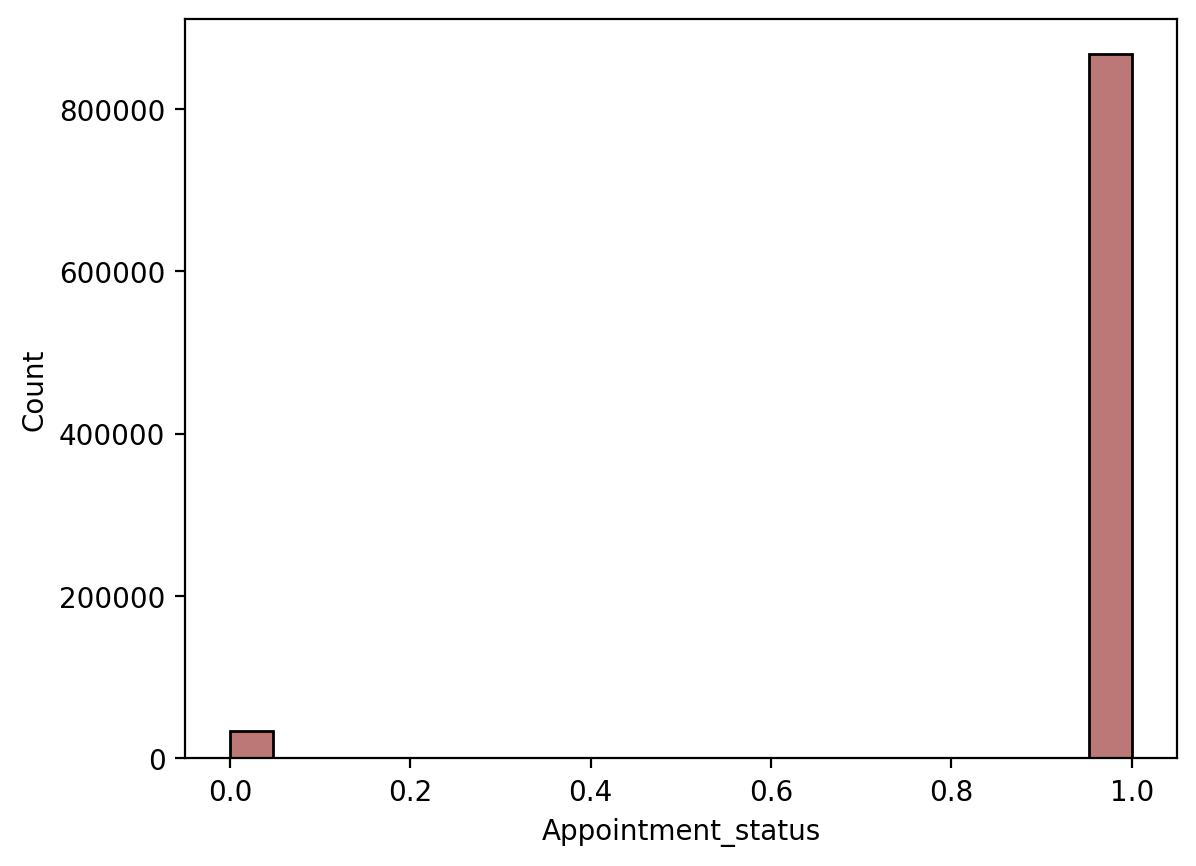

temp


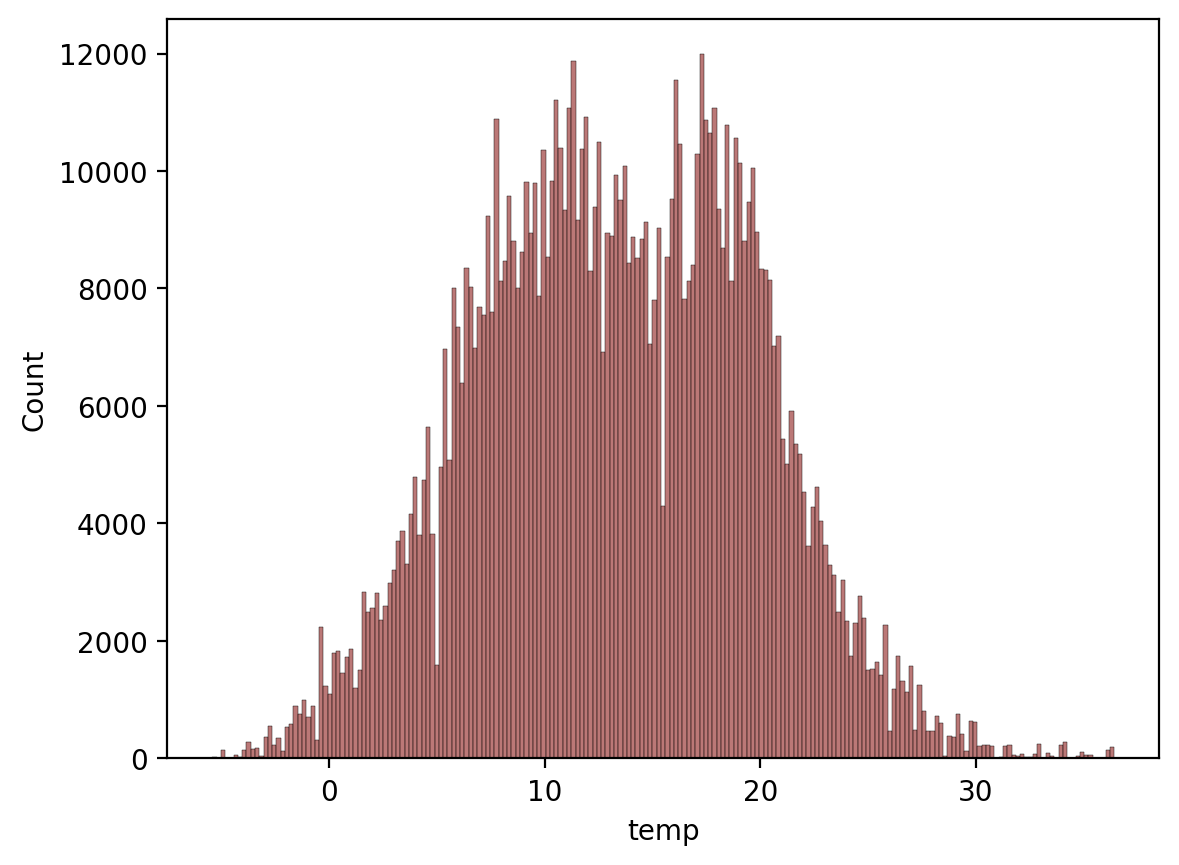

precipitation


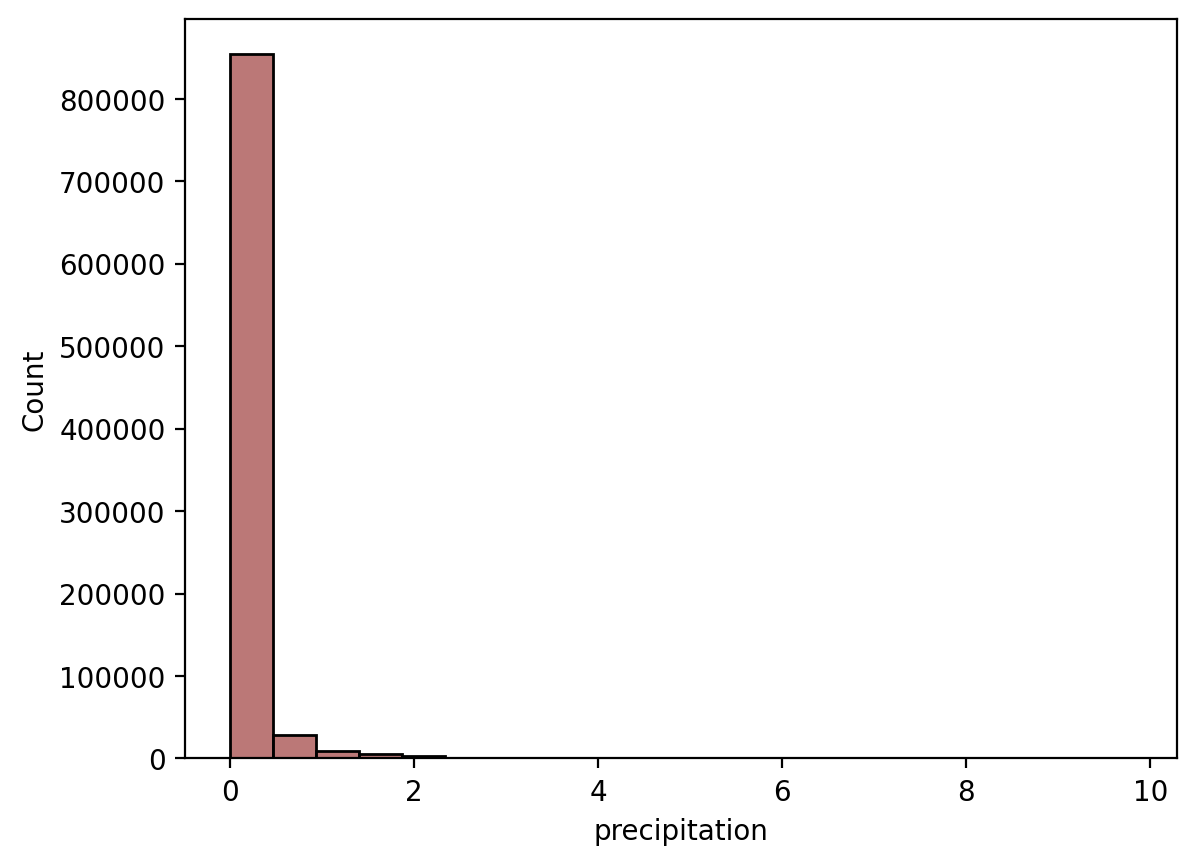

Age


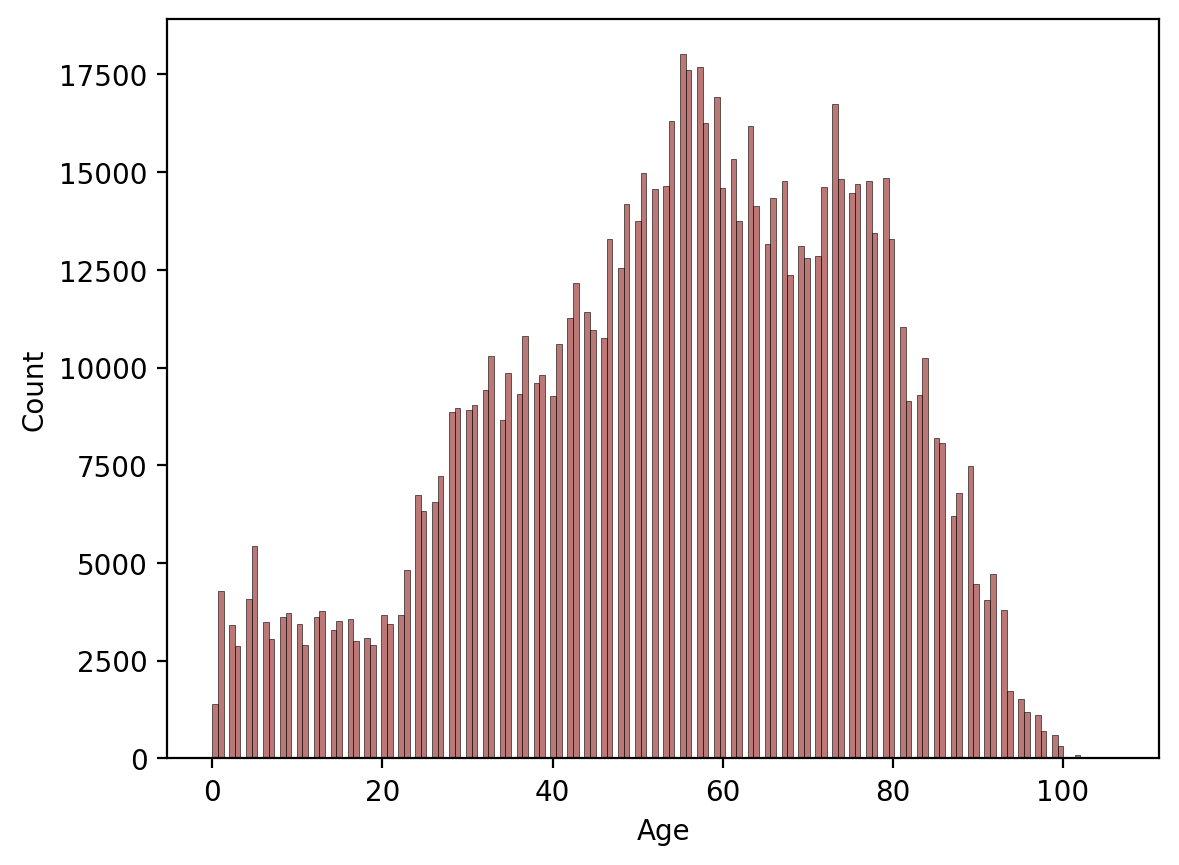

Sex


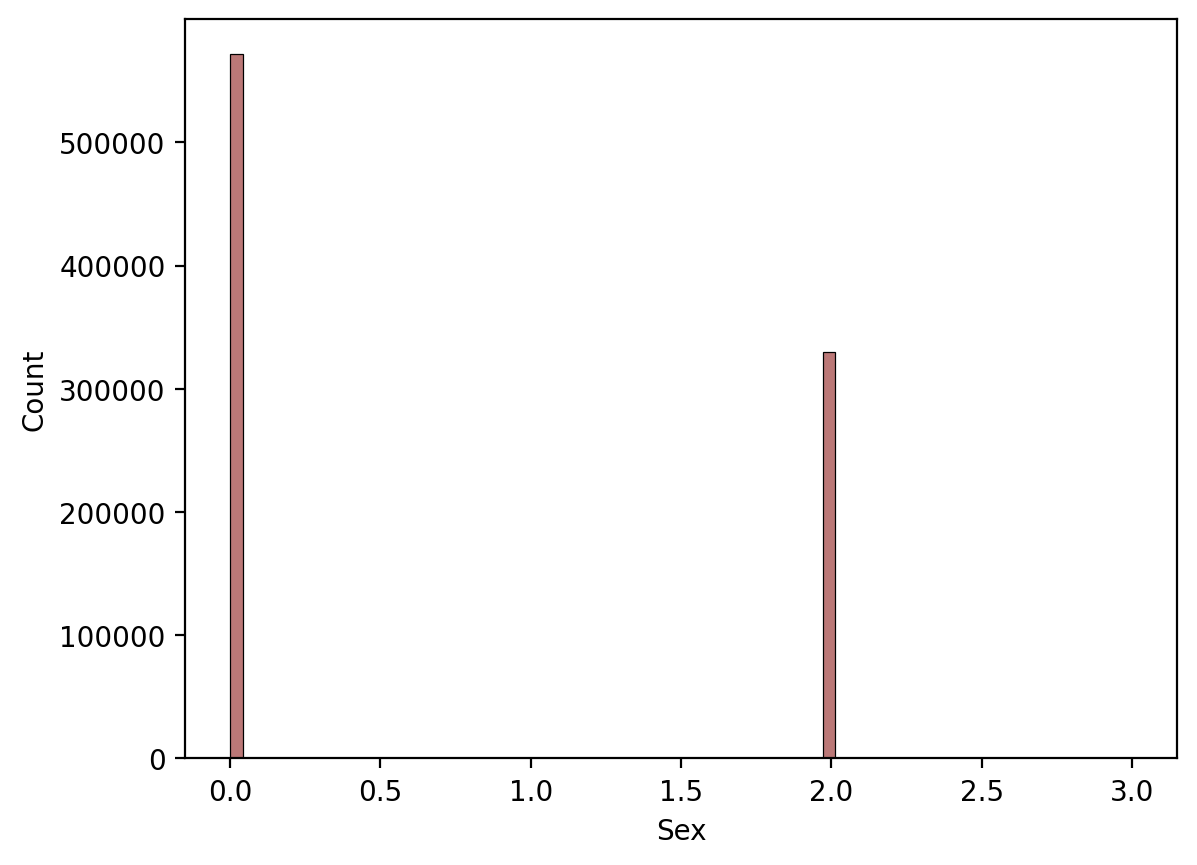

FRAILTY


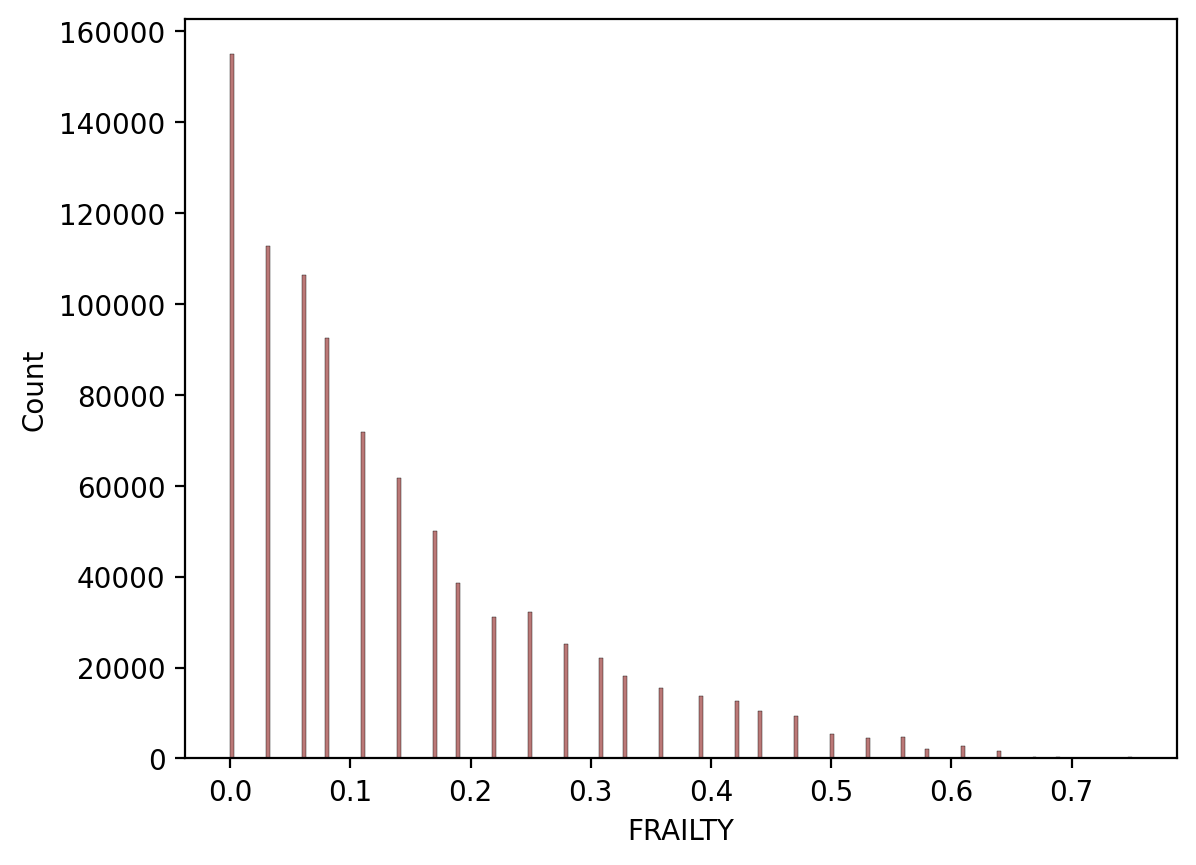

DEPRESSION


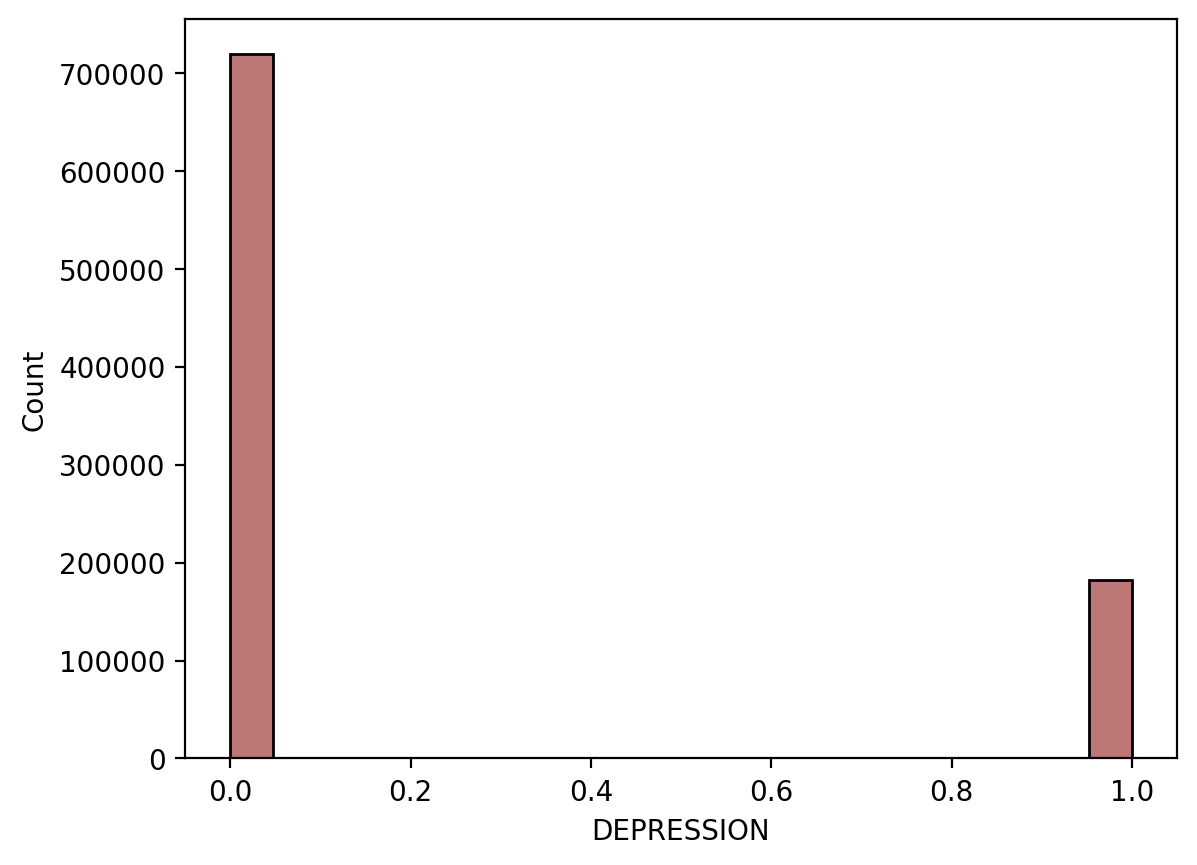

OBESITY


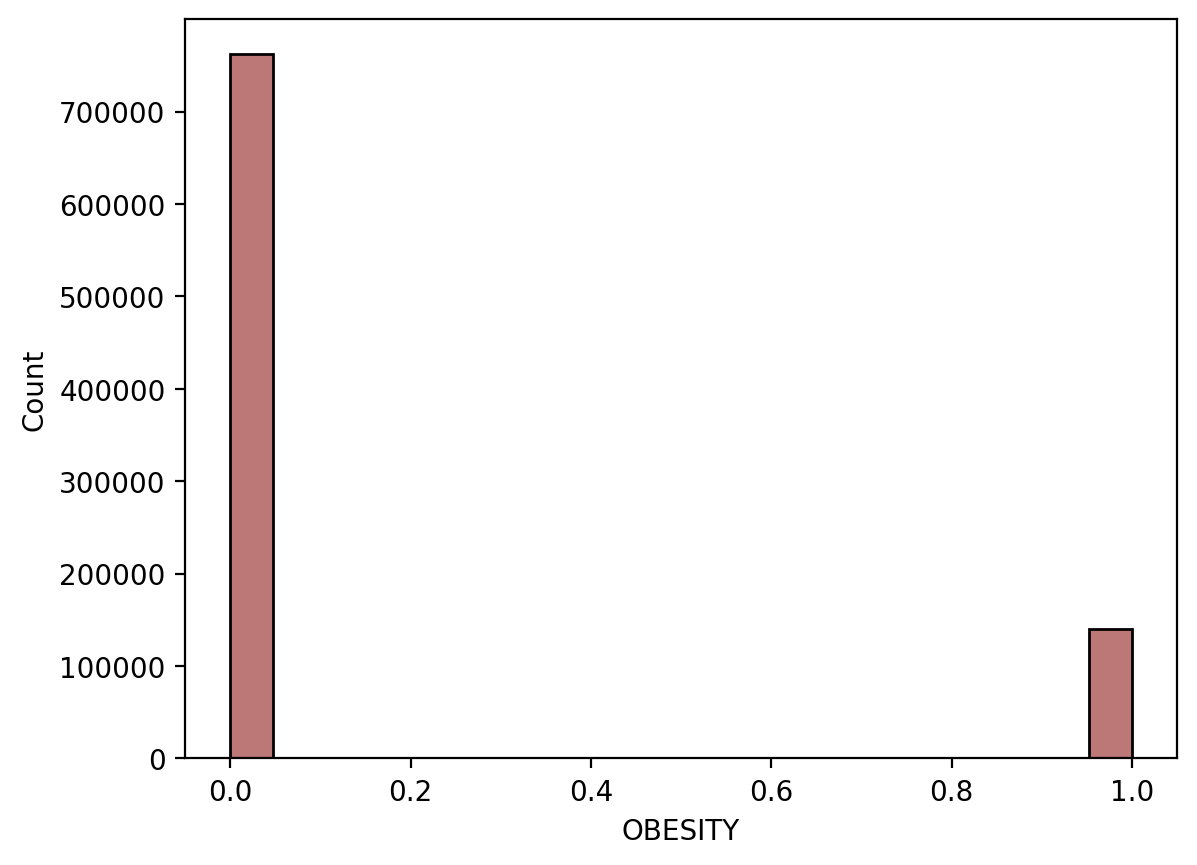

IHD


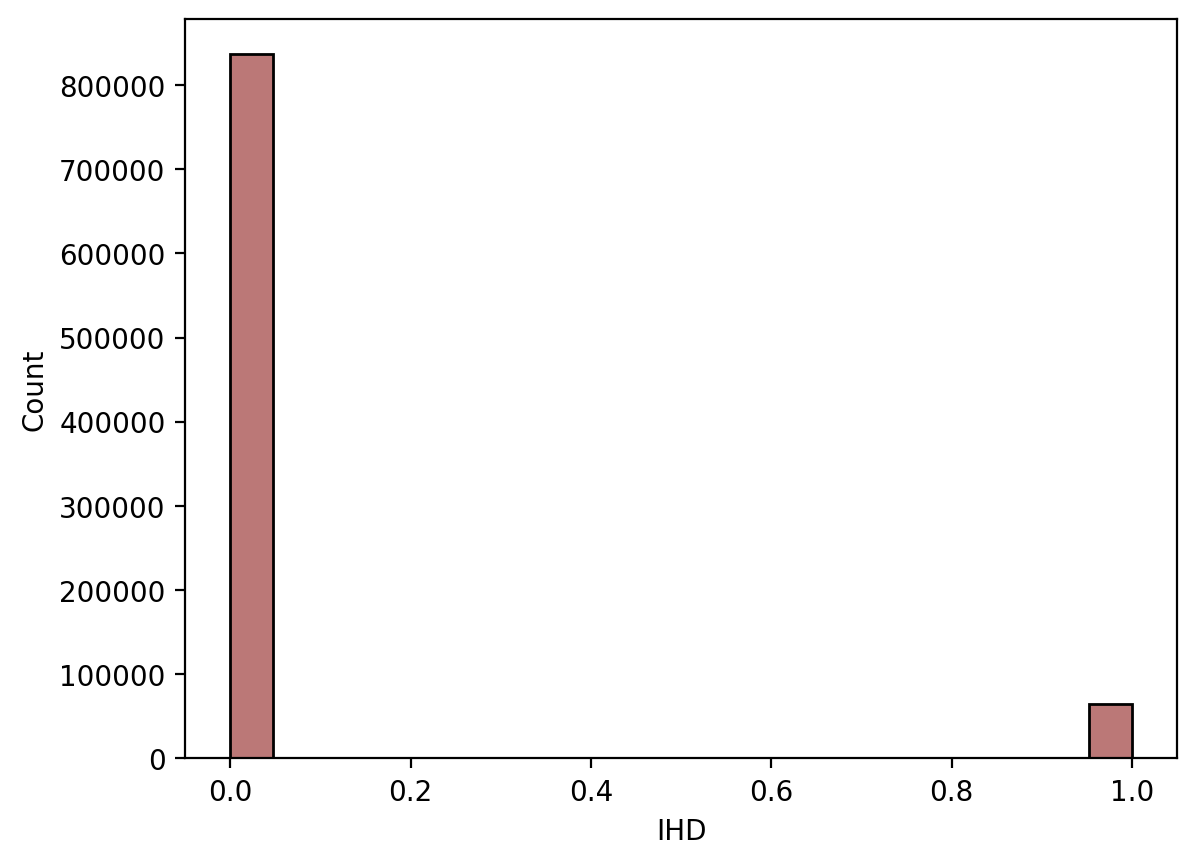

DM


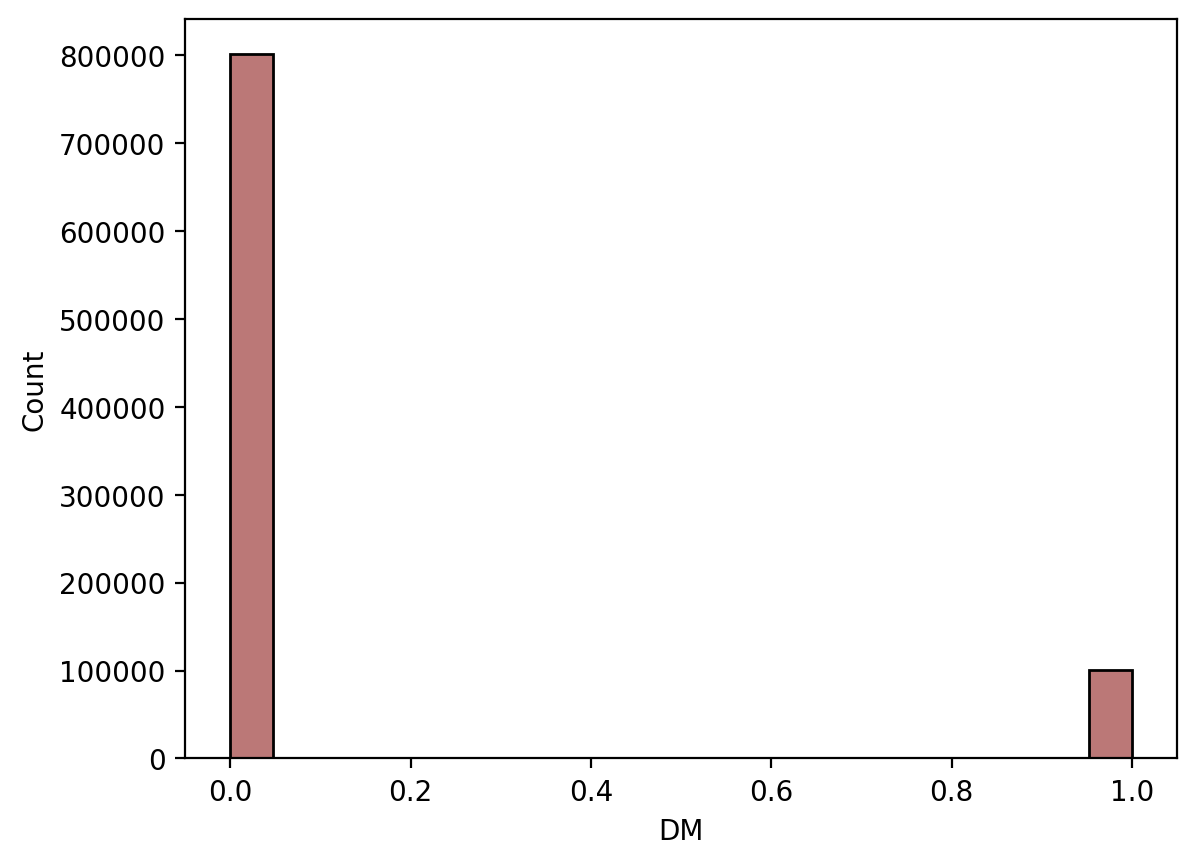

HPT


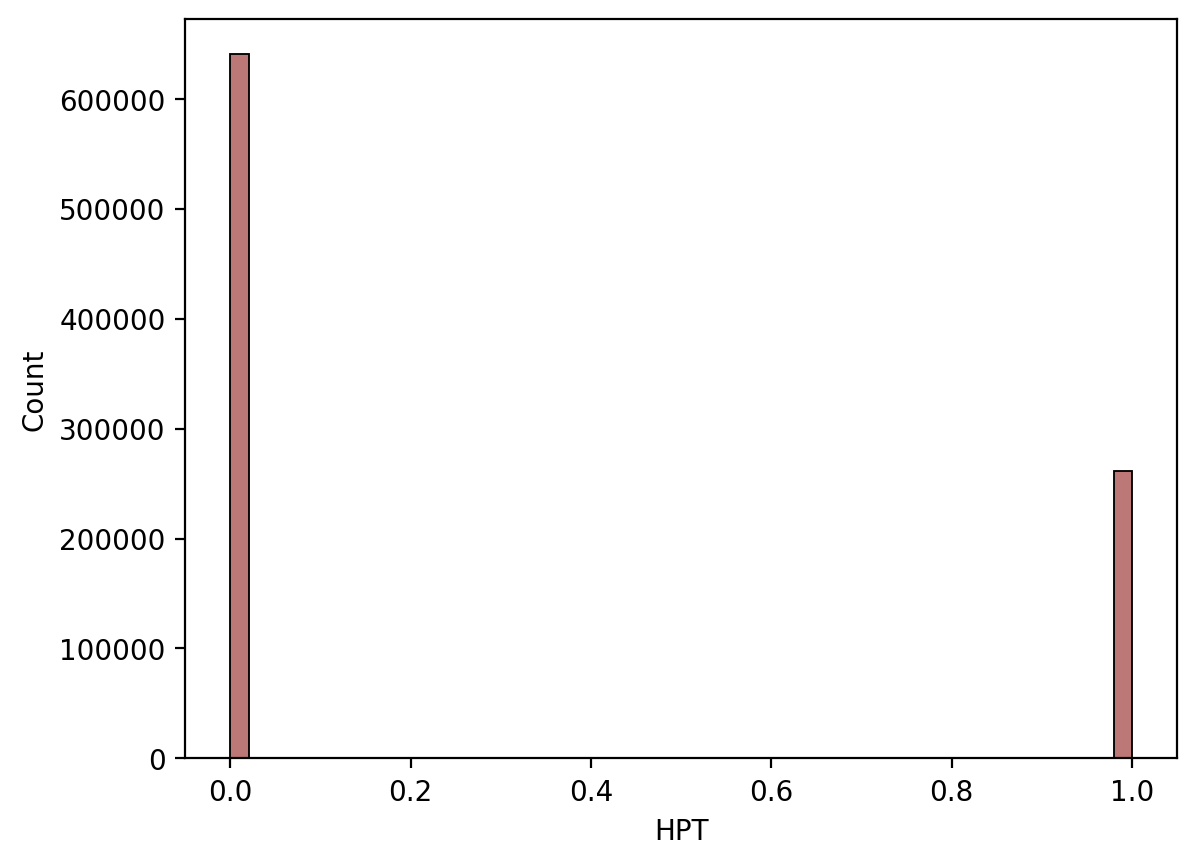

NDHG


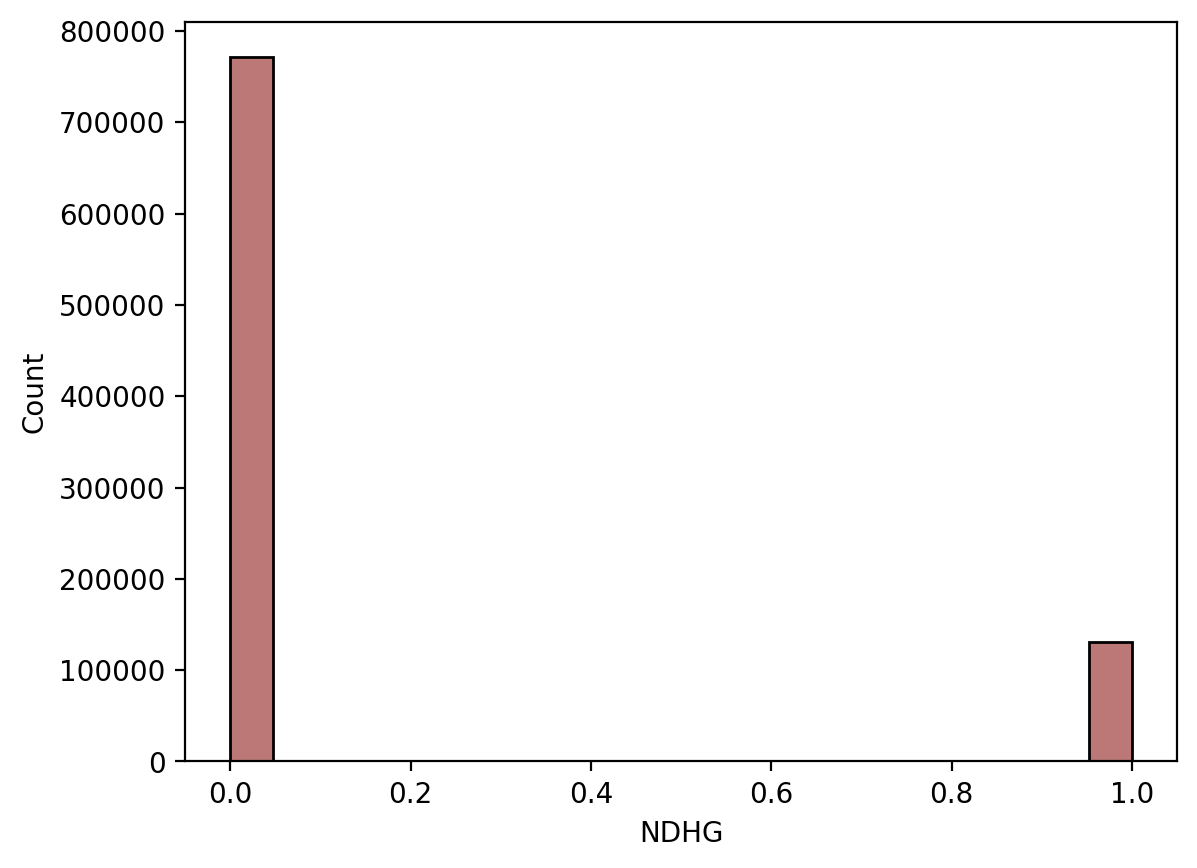

SMI


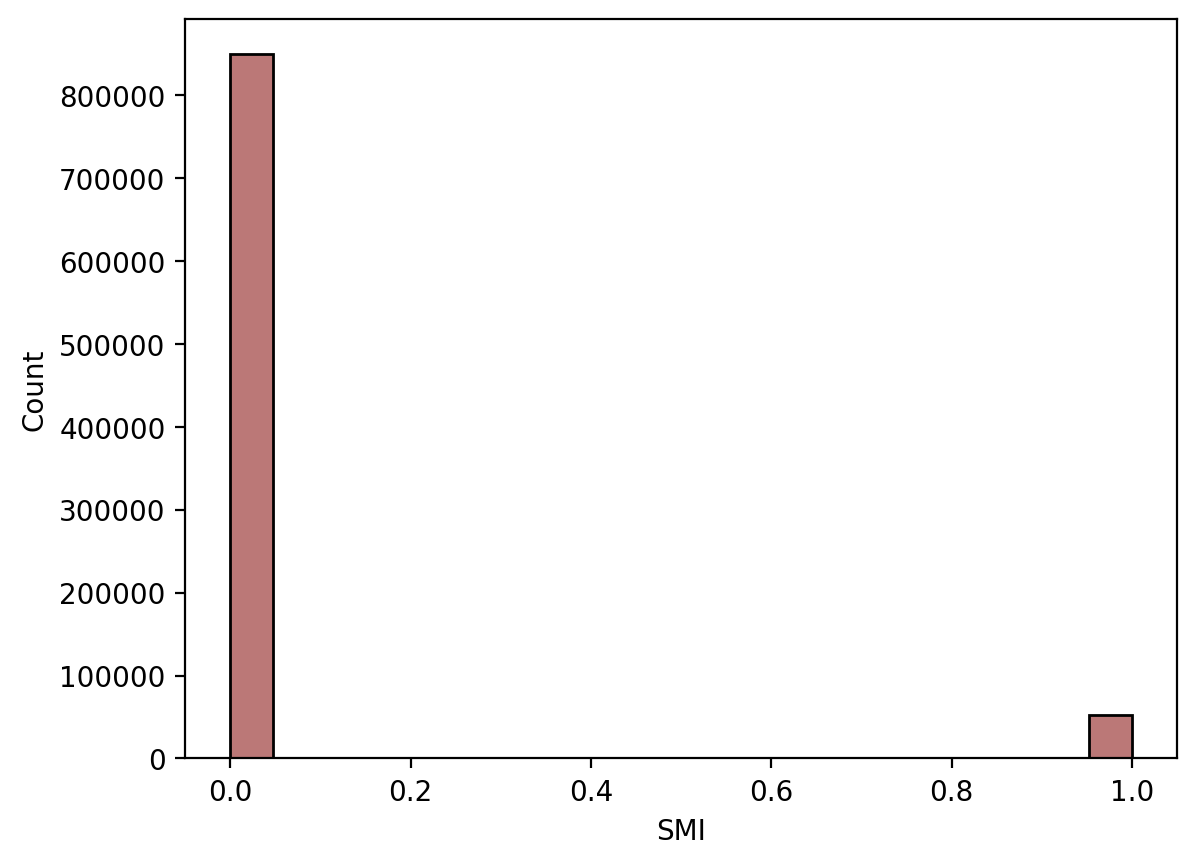

IMD2023


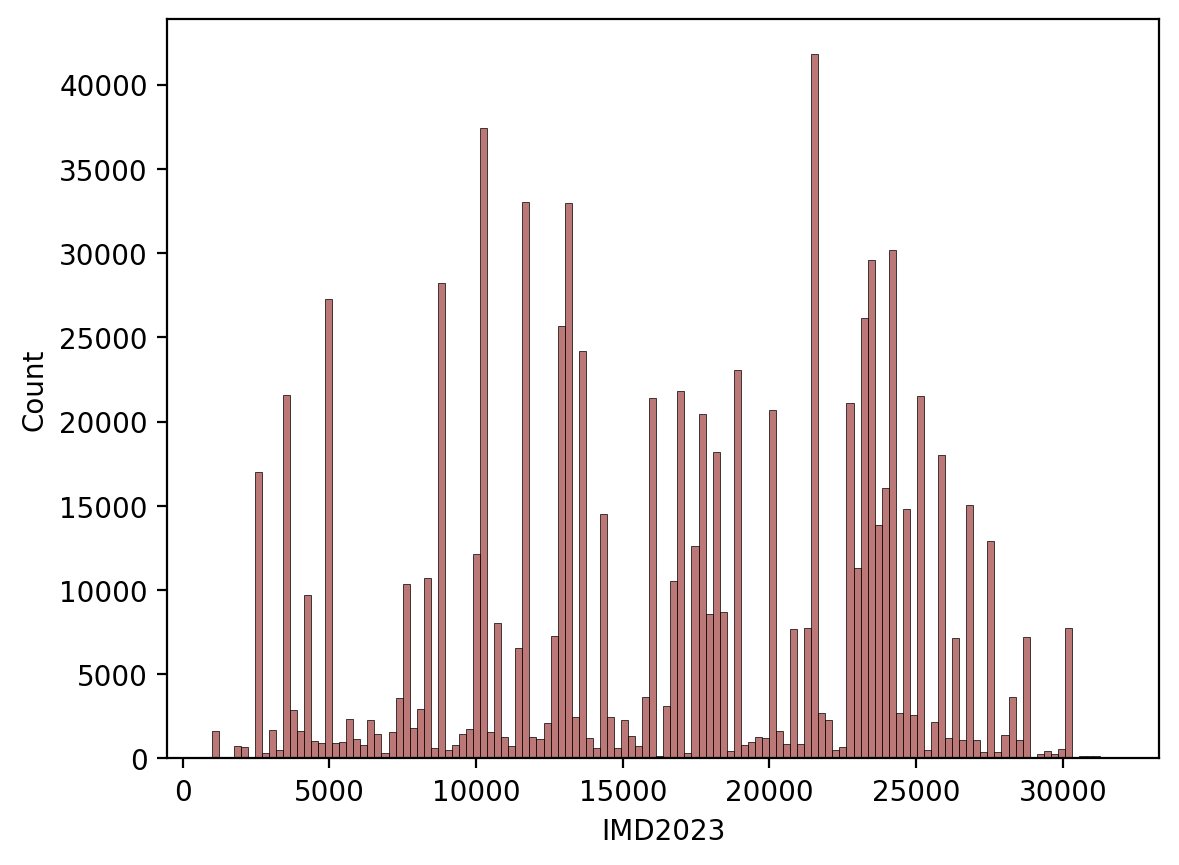

dist_to_station


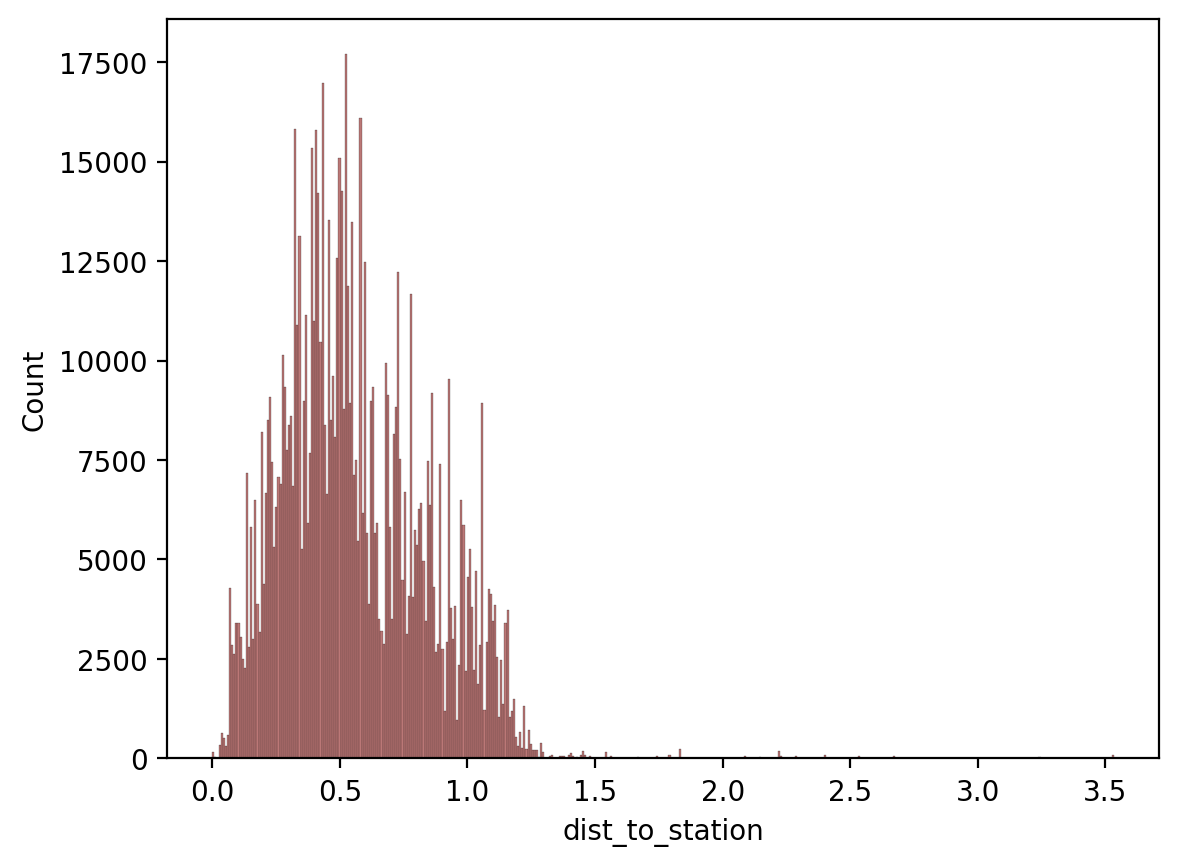

distance_to_surg


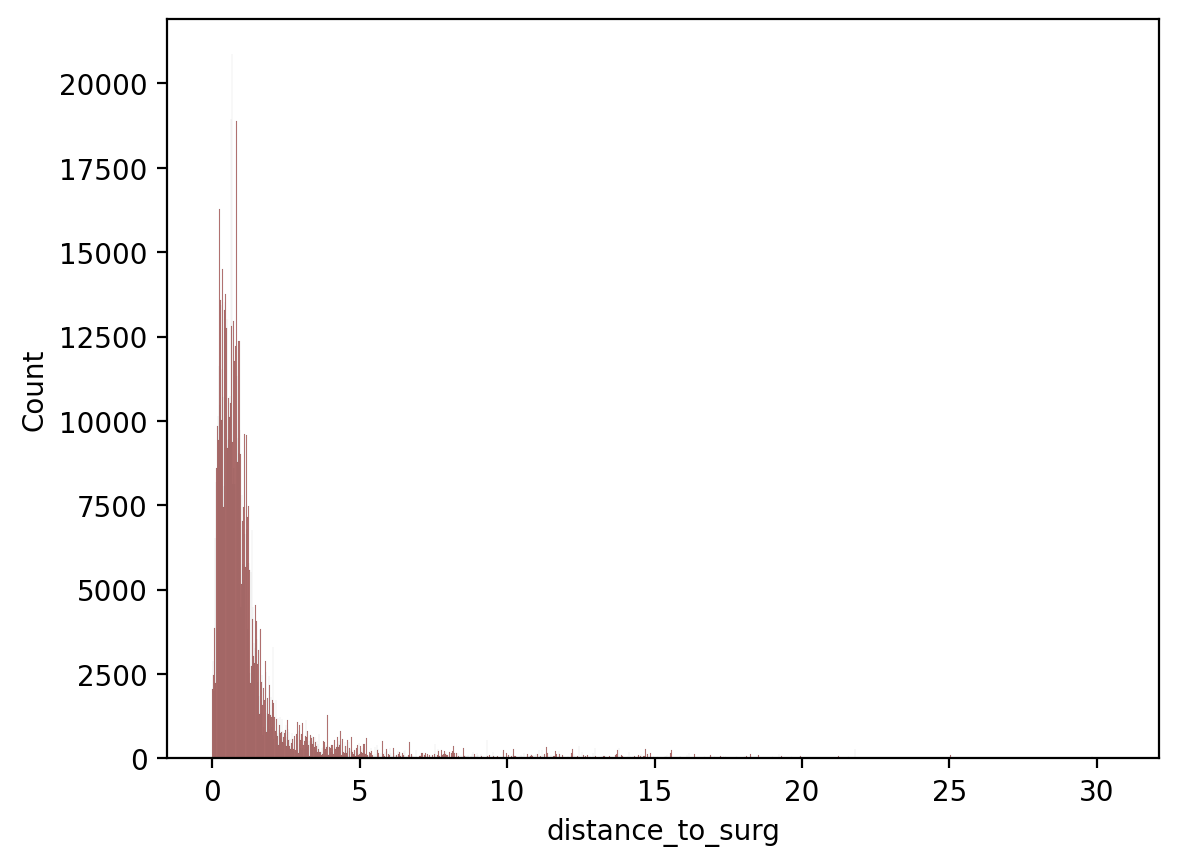

book_to_app_days


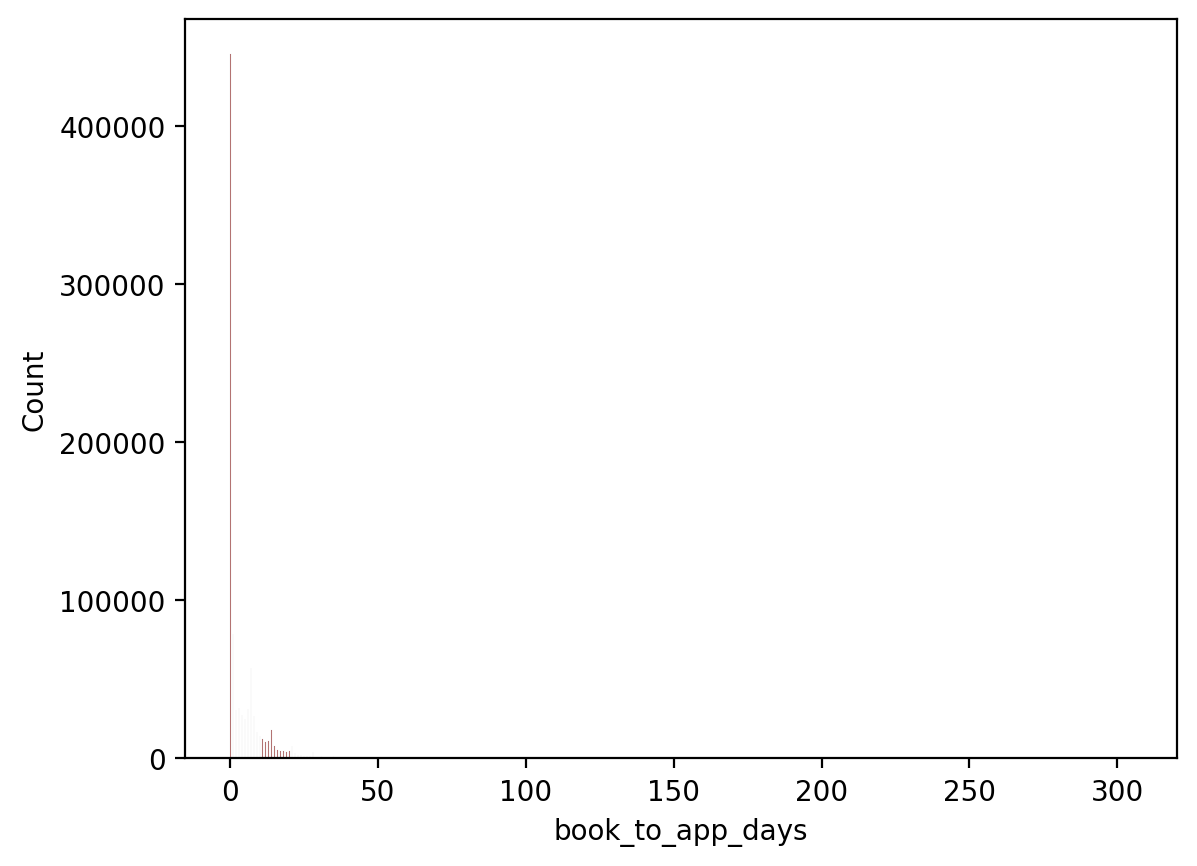

booked_by_clinician


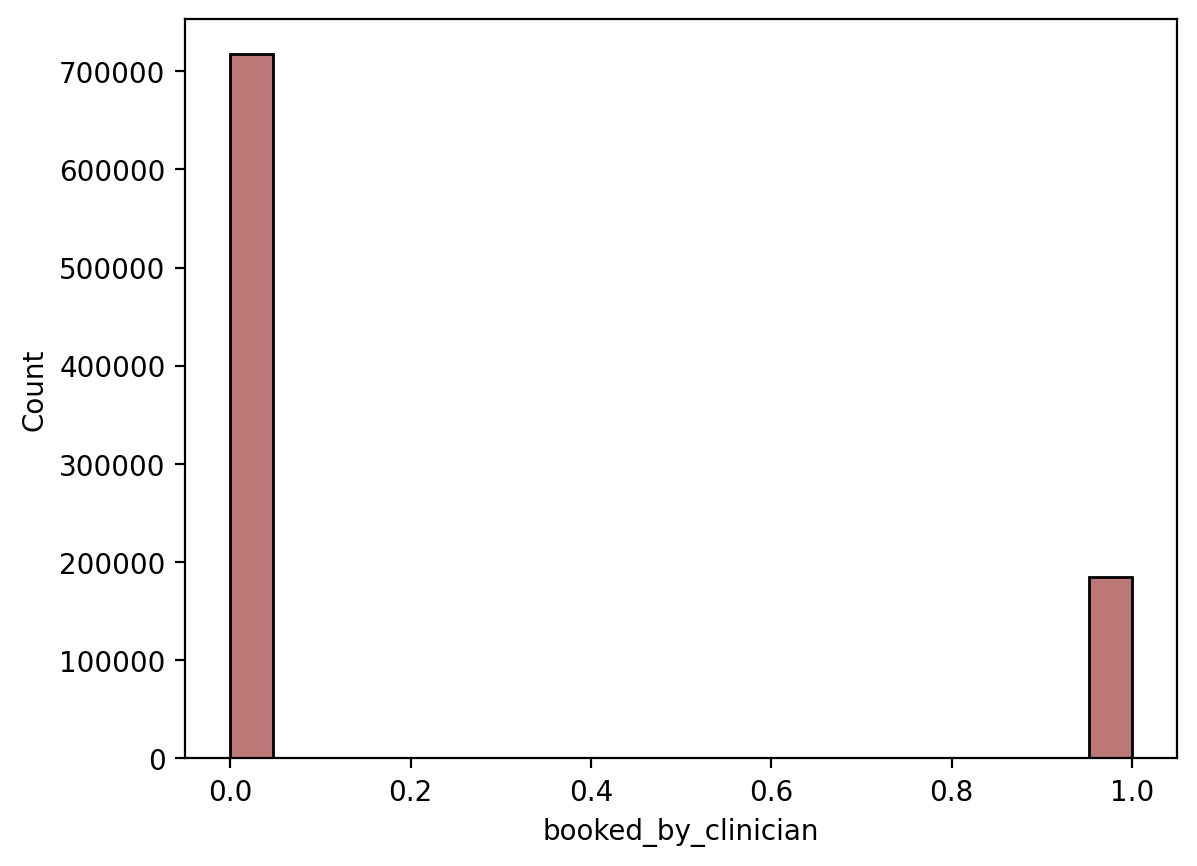

registered_for_months


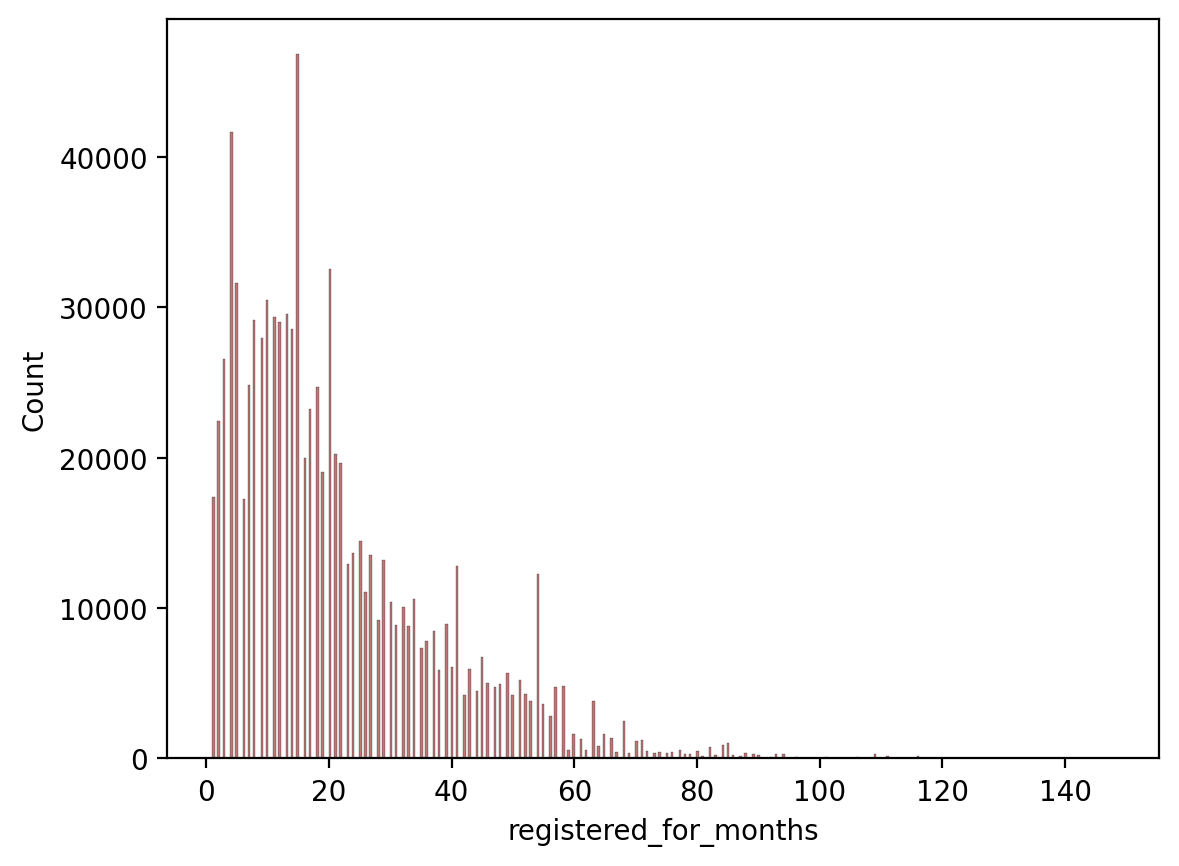

sin_week


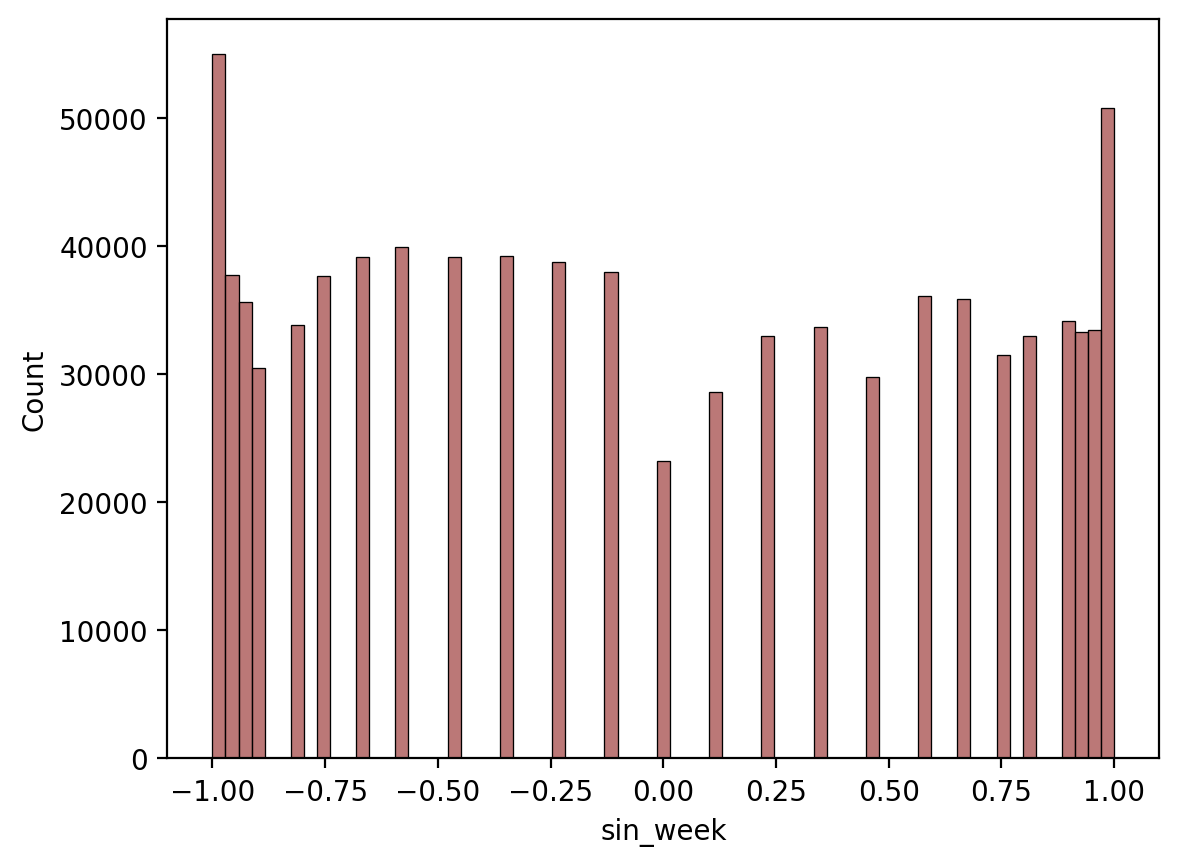

cos_week


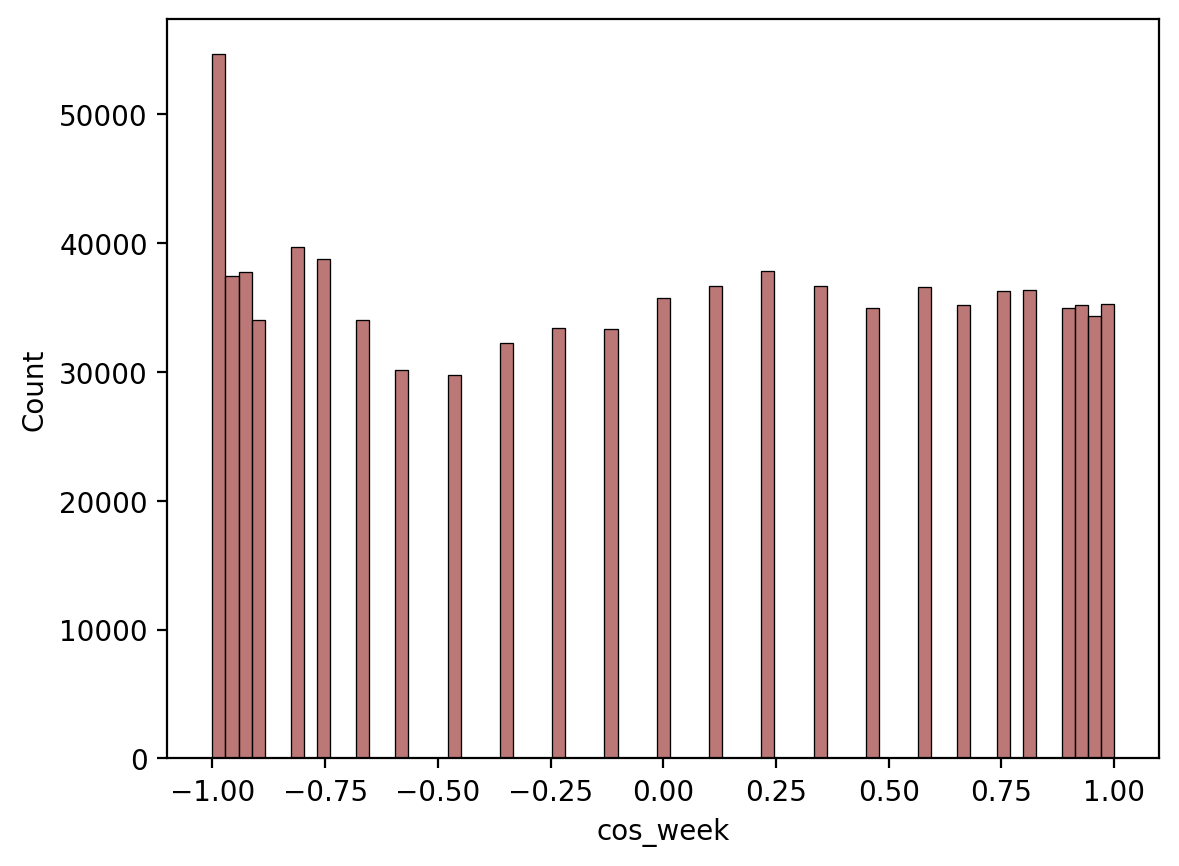

sin_Appointment_time


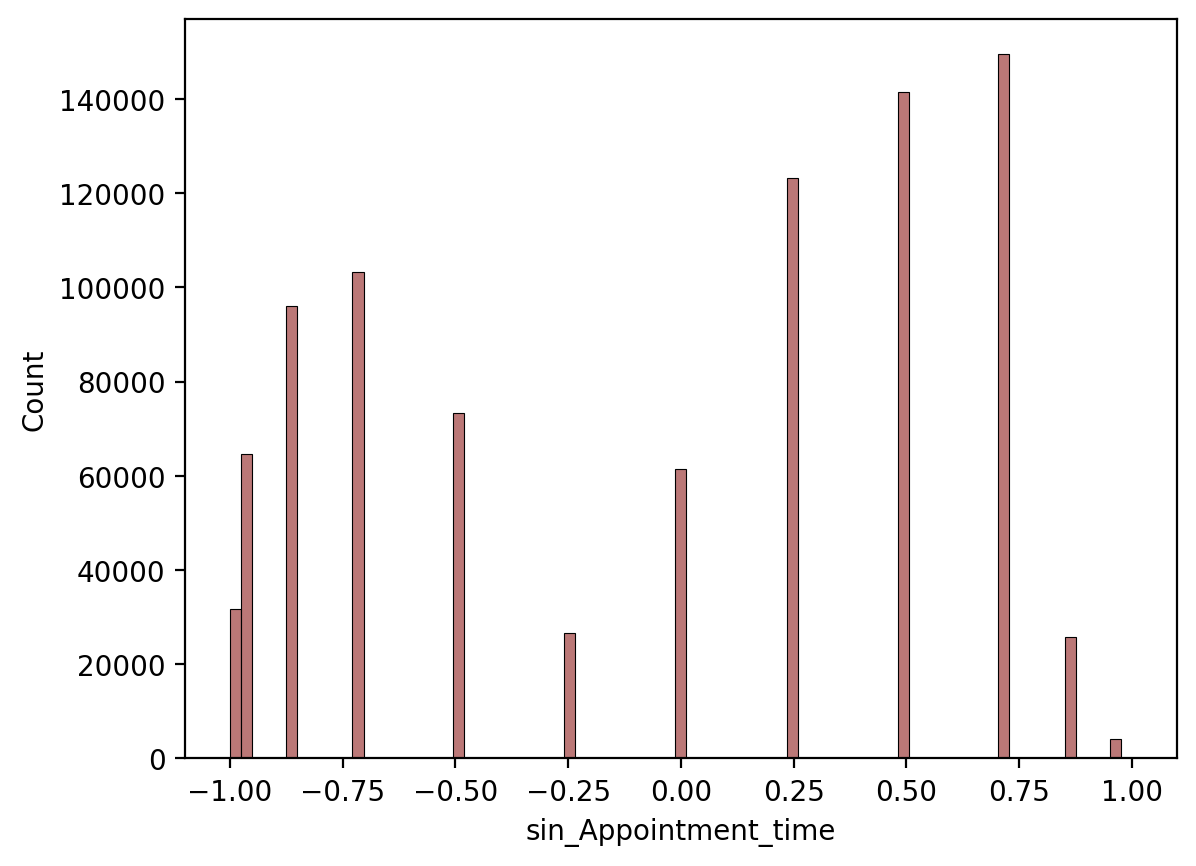

cos_Appointment_time


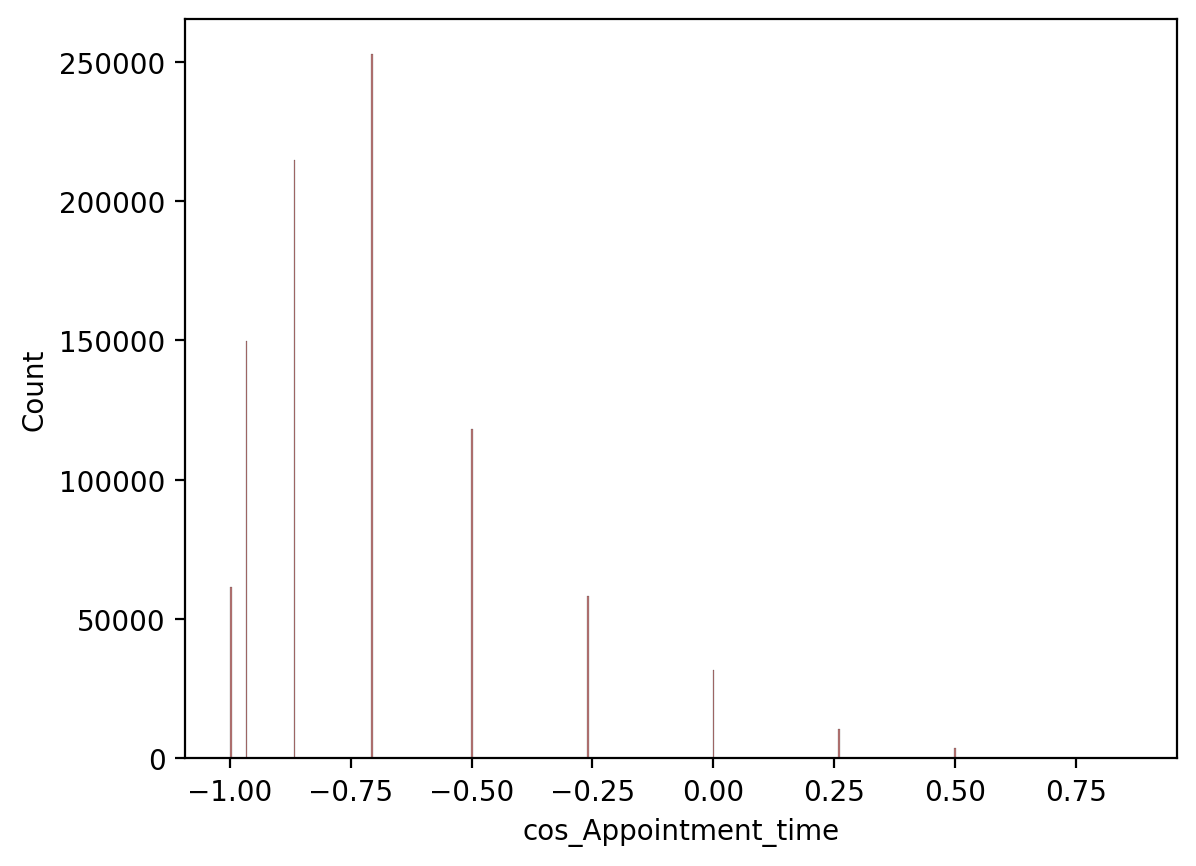

sin_month


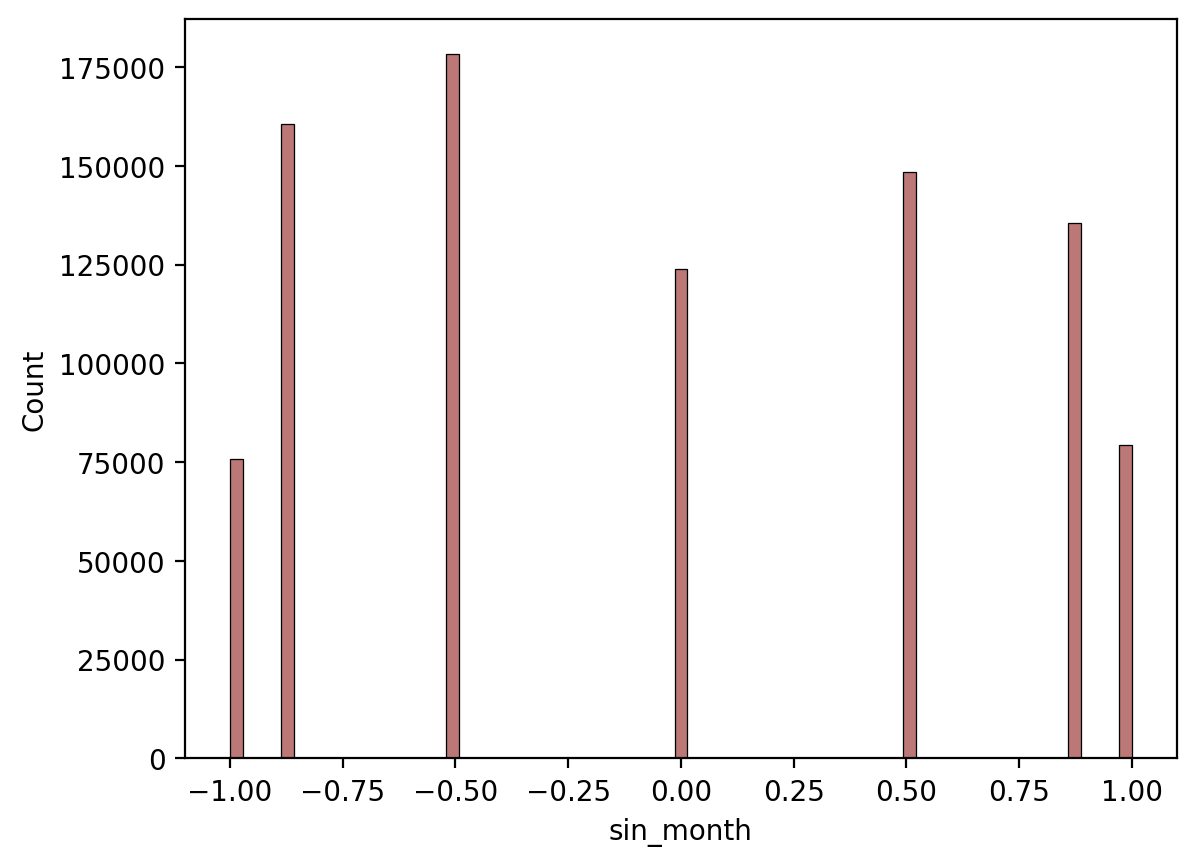

cos_month


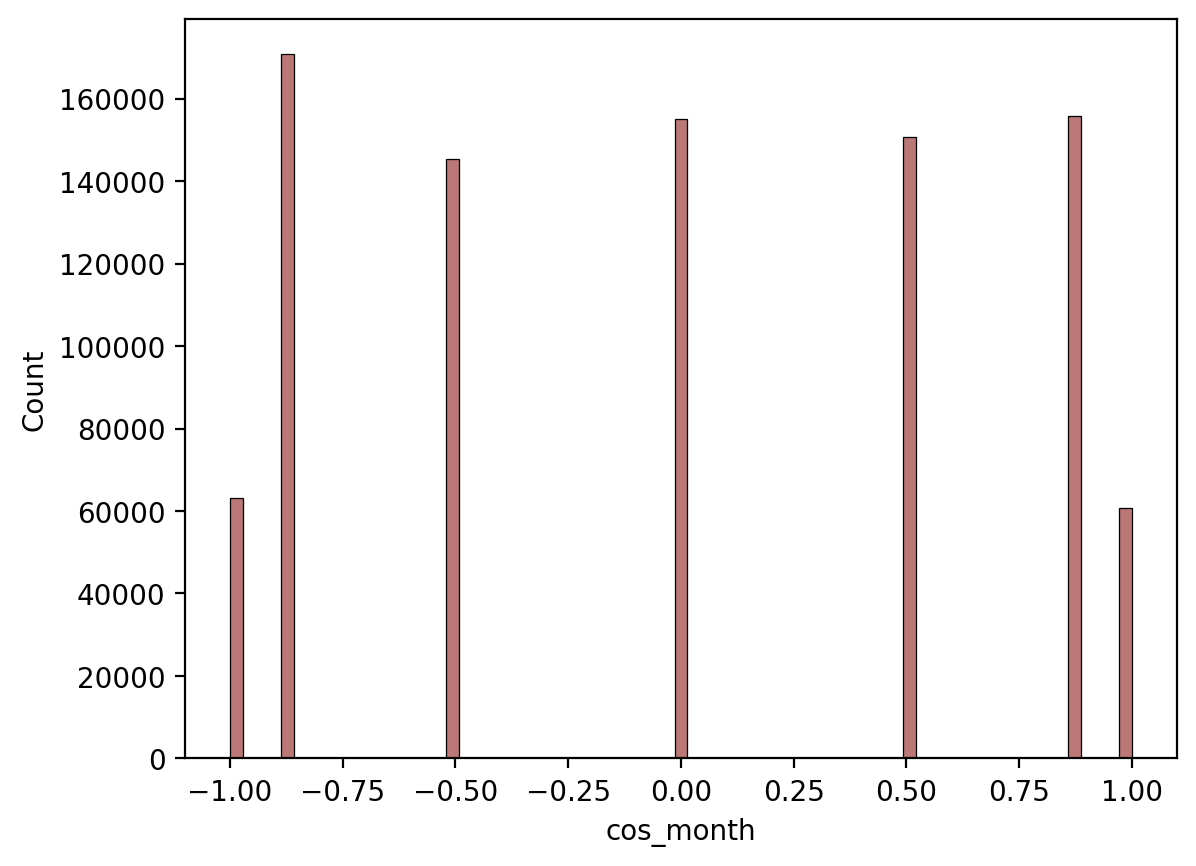

sin_day_of_week


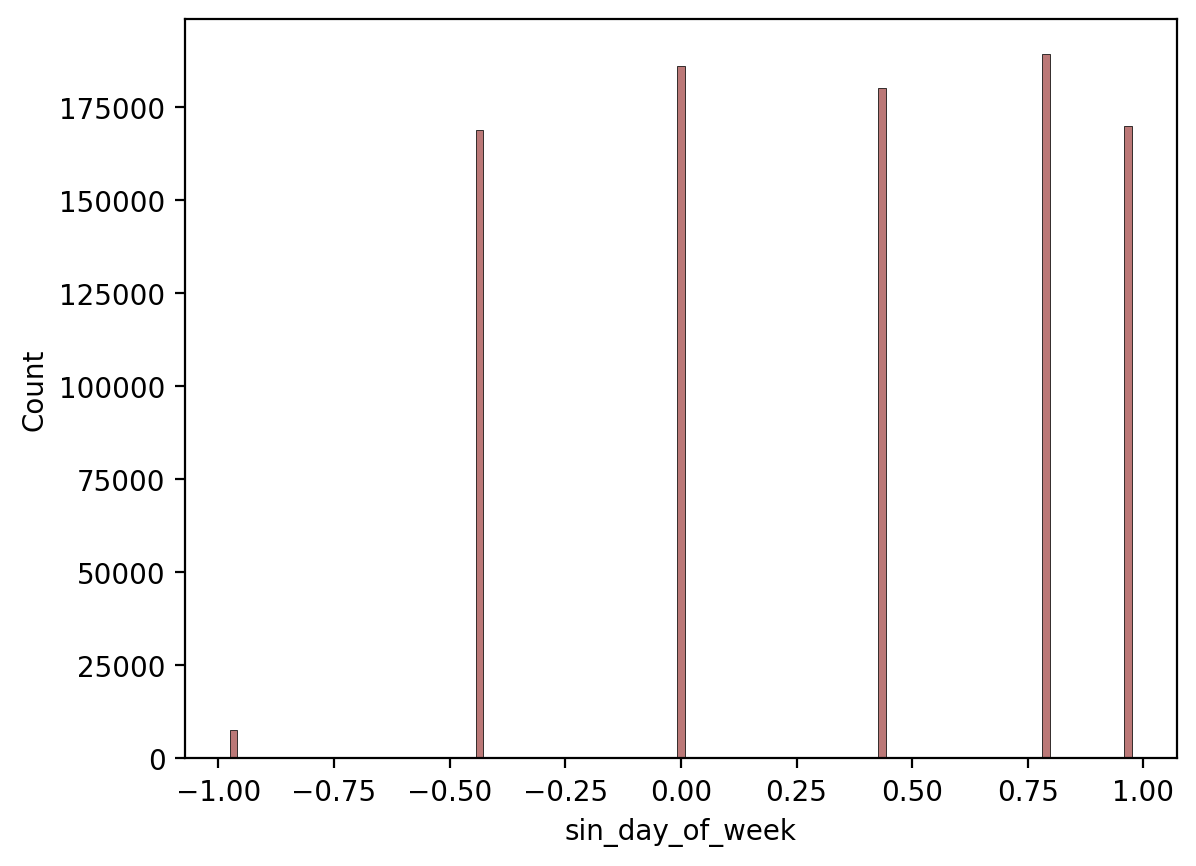

cos_day_of_week


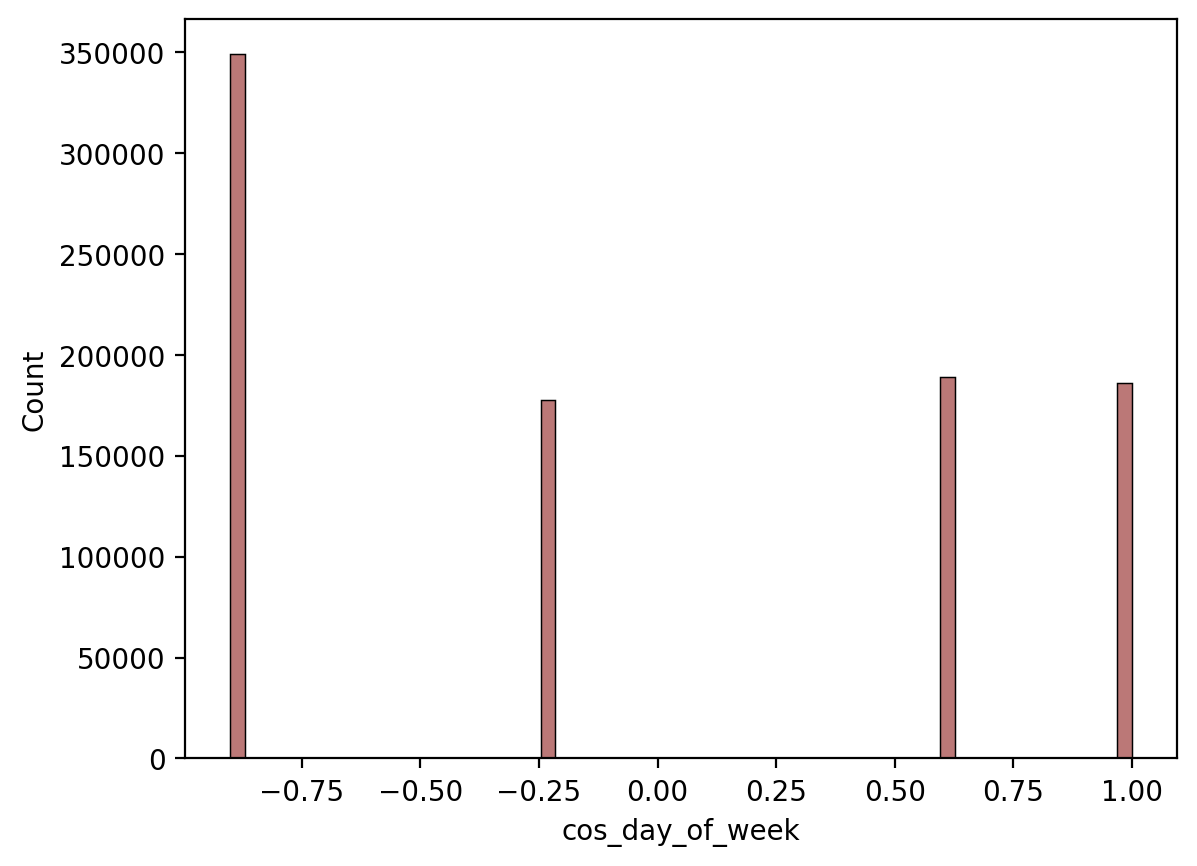

No_shows


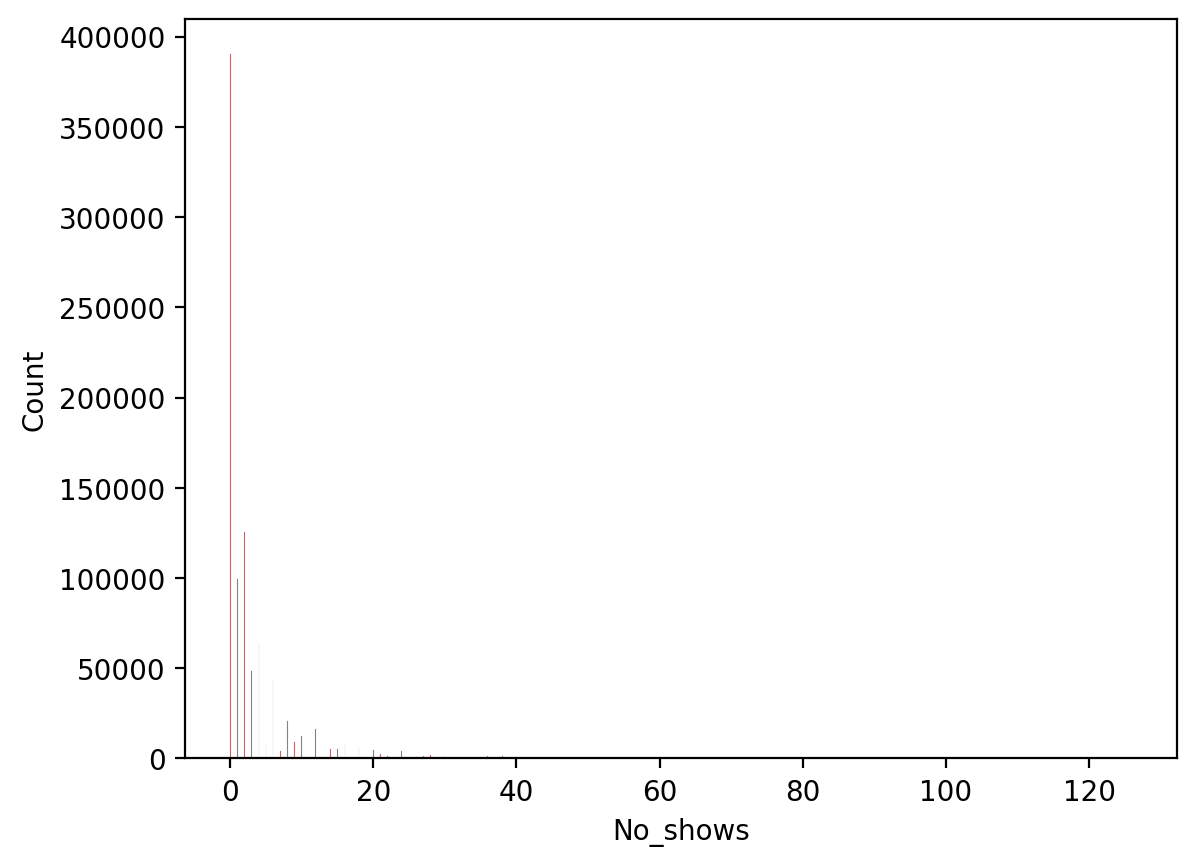

Rota_ARRS


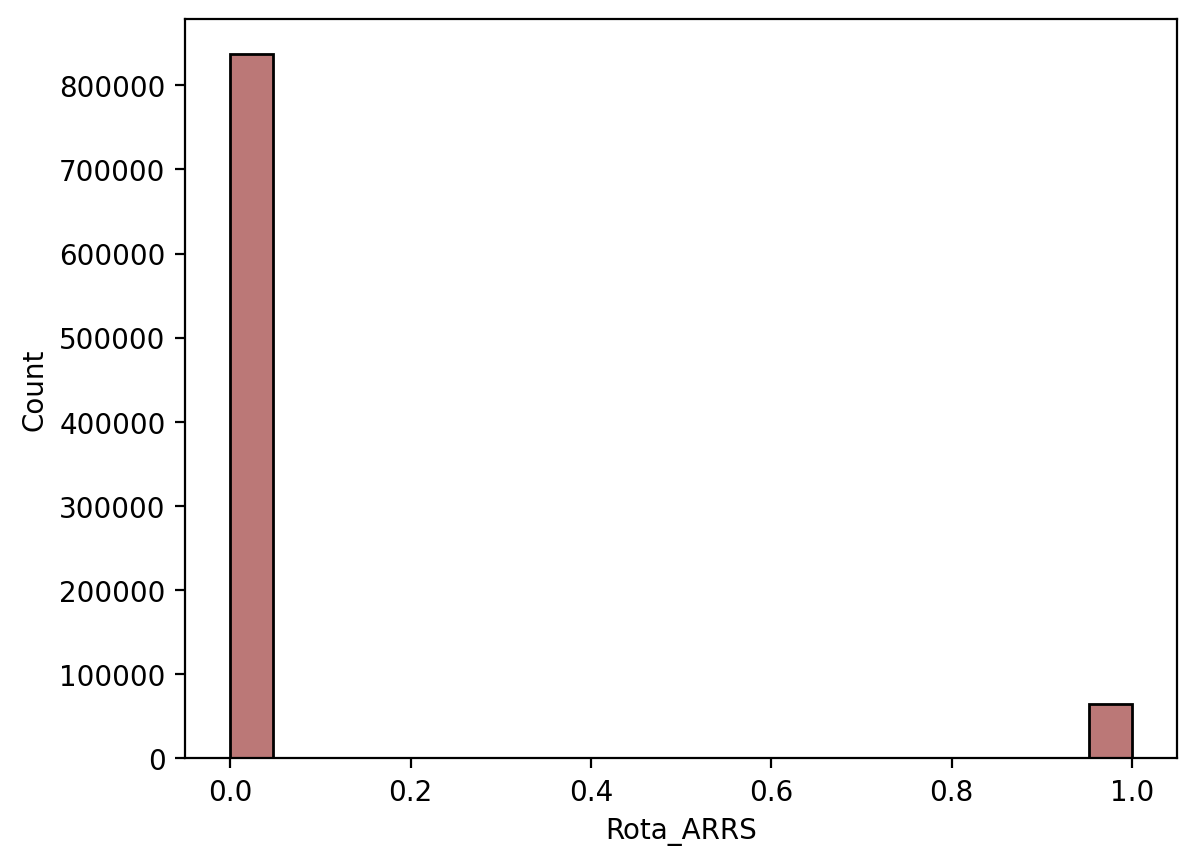

Rota_GP


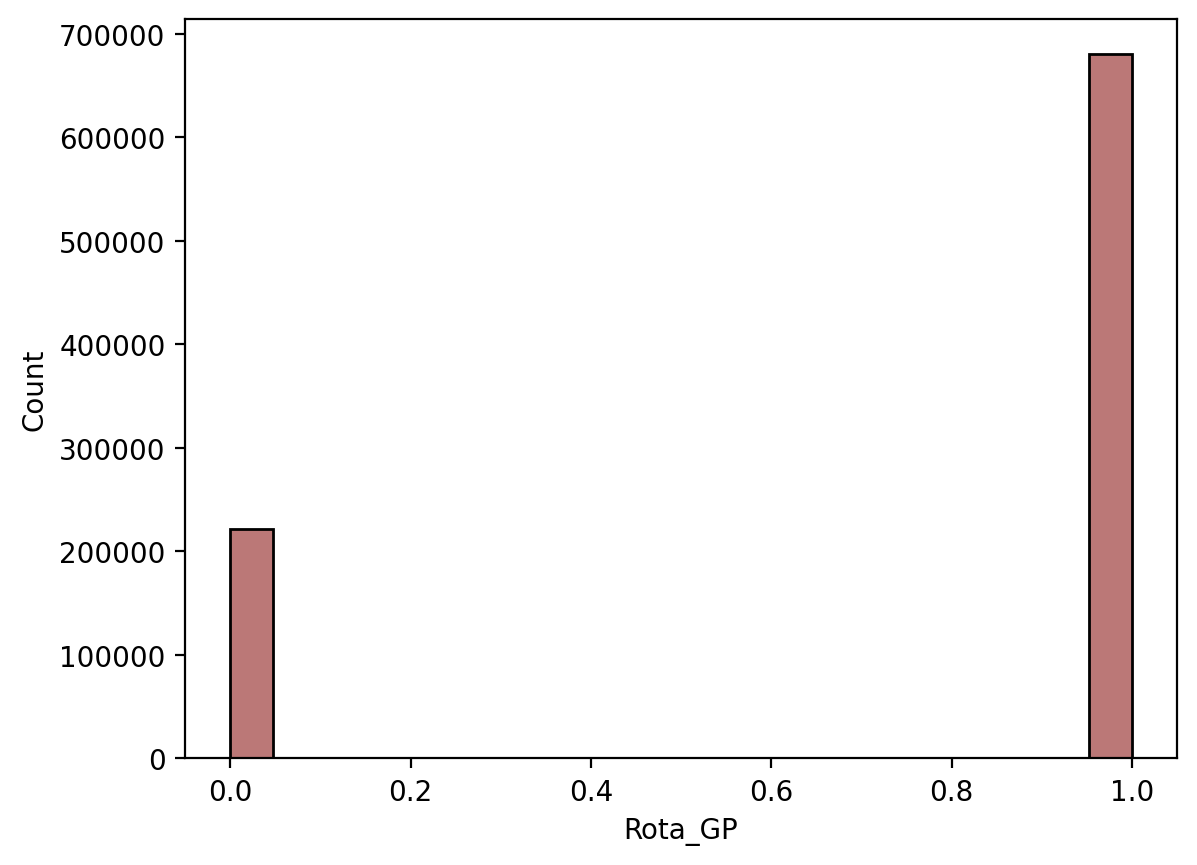

Rota_HCA


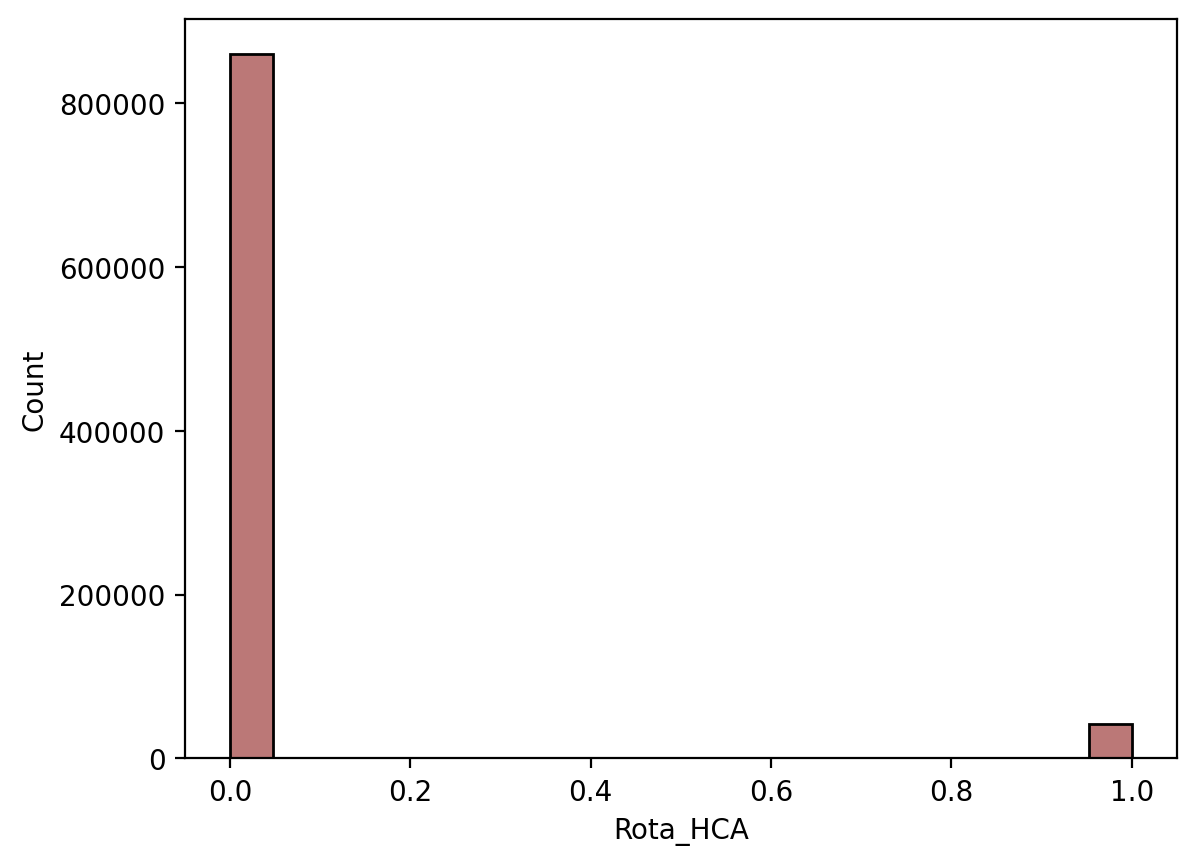

Rota_Nurse


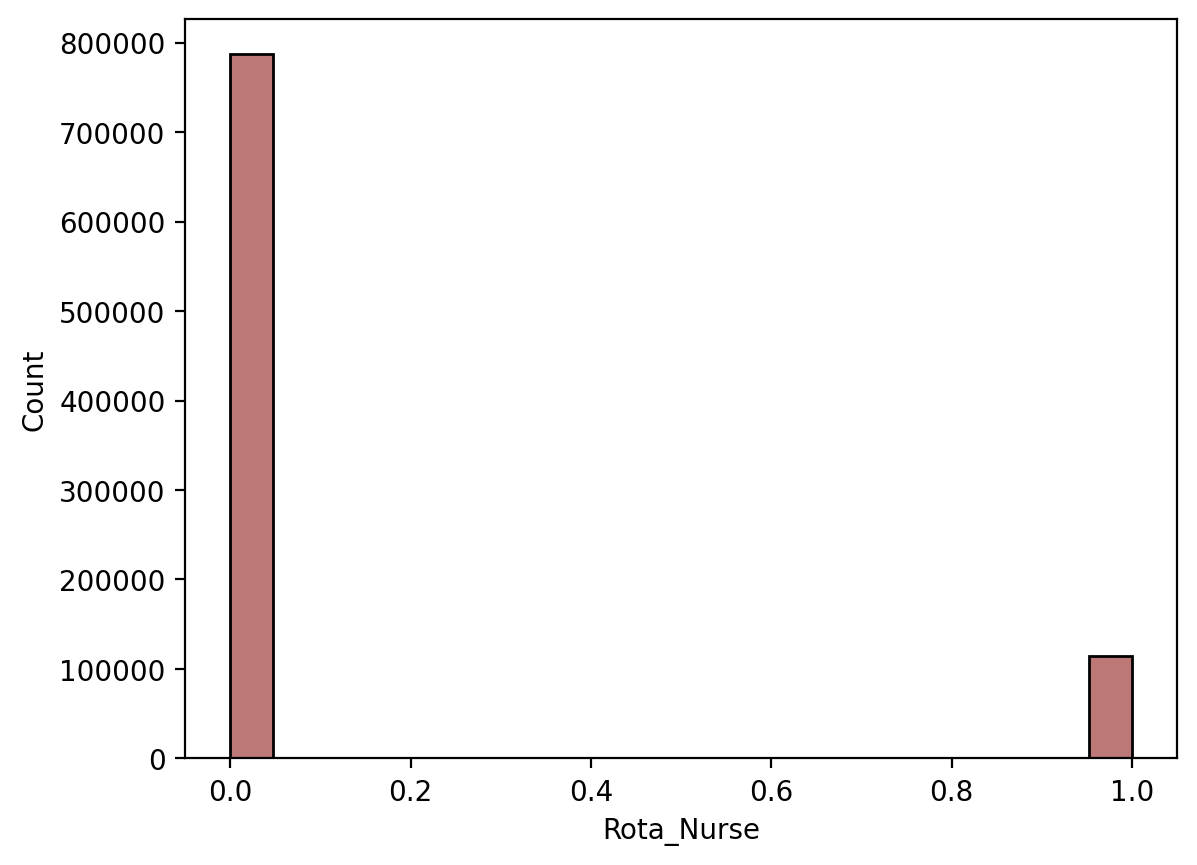

Ethnicity_Asian


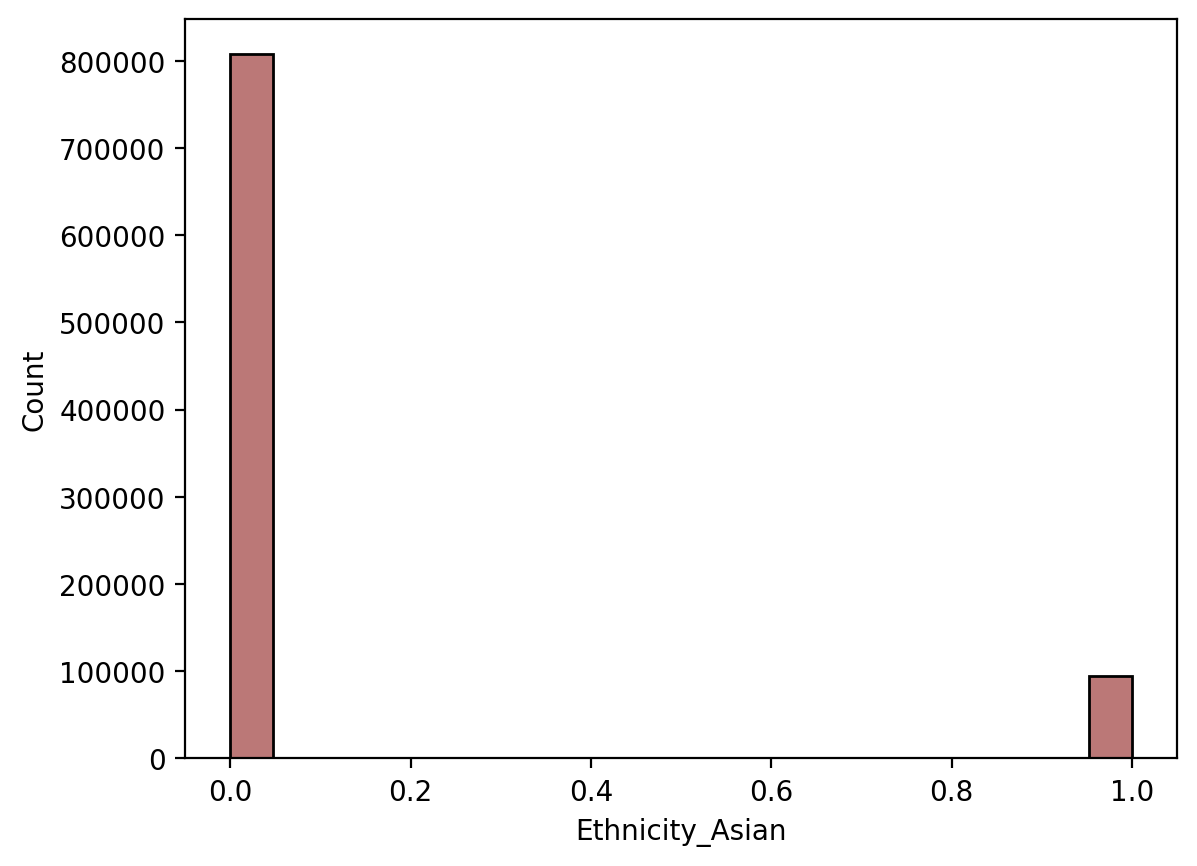

Ethnicity_Black


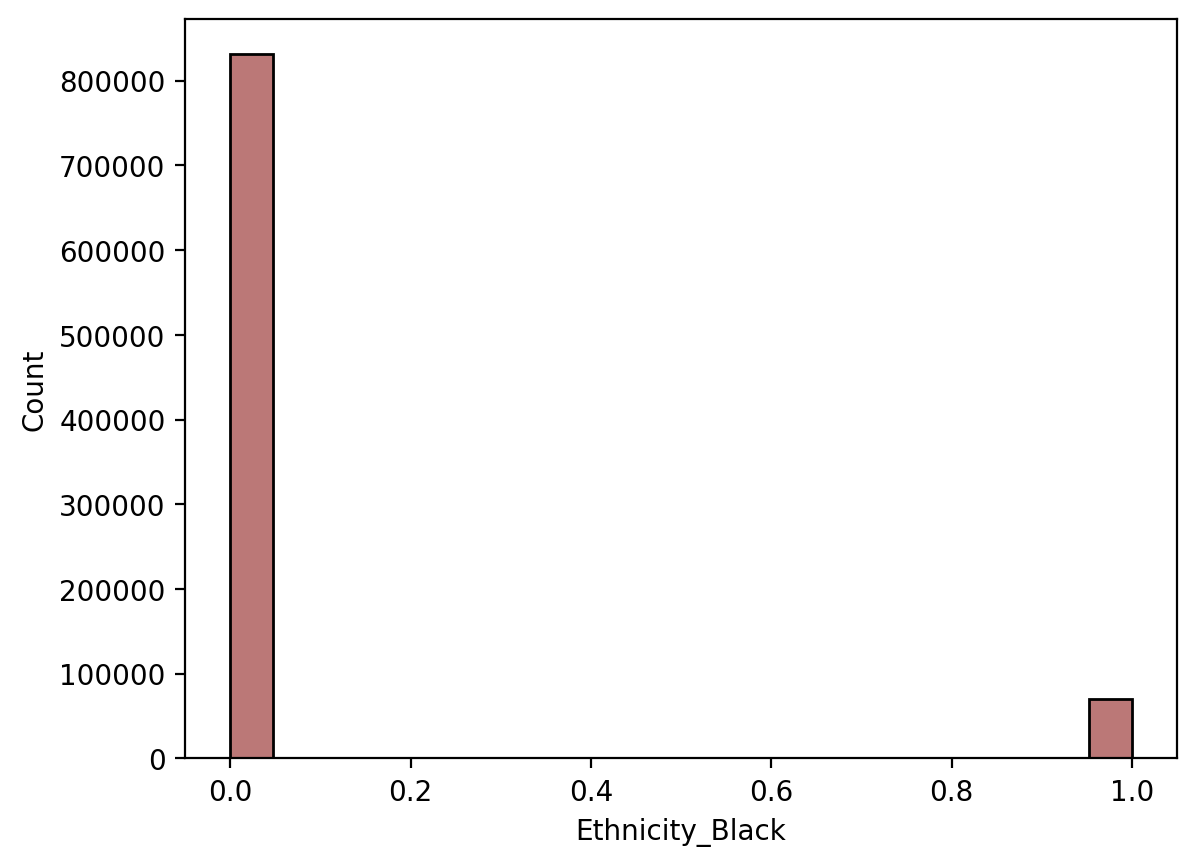

Ethnicity_Mixed


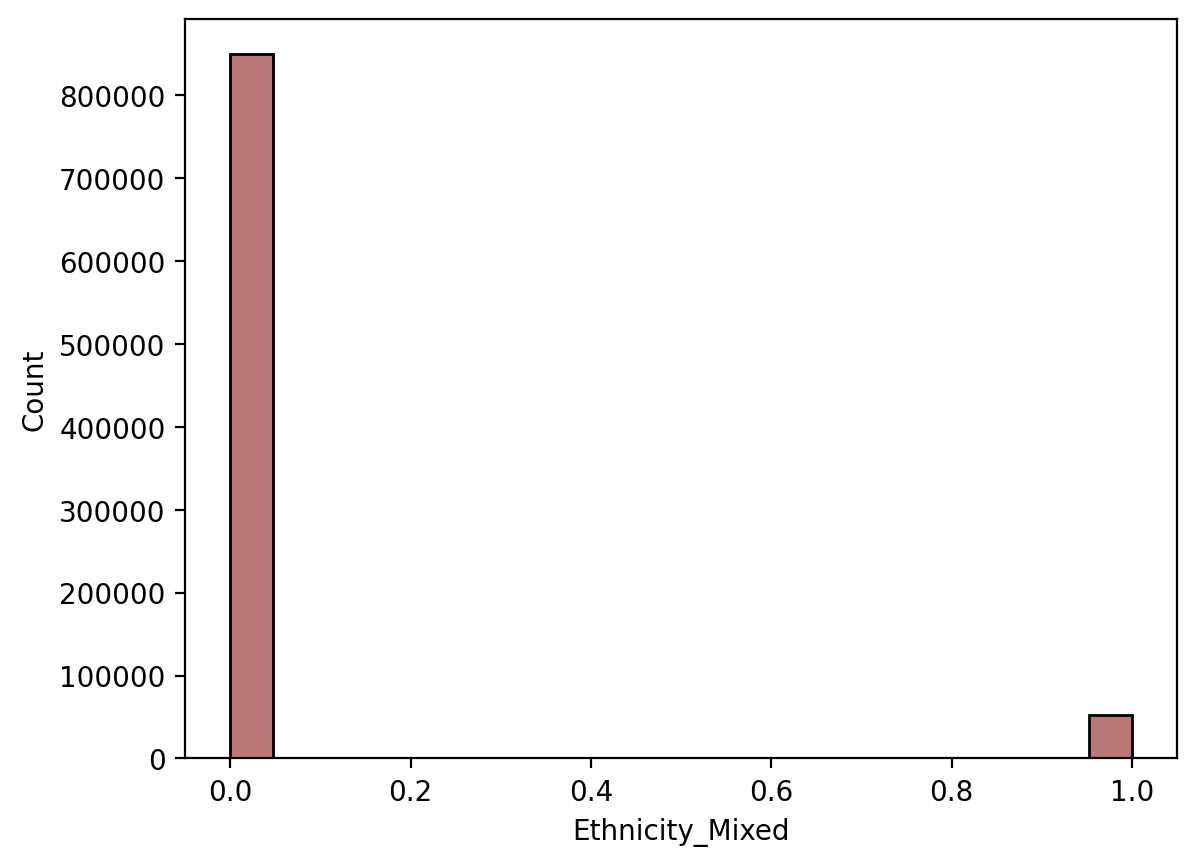

Ethnicity_Other


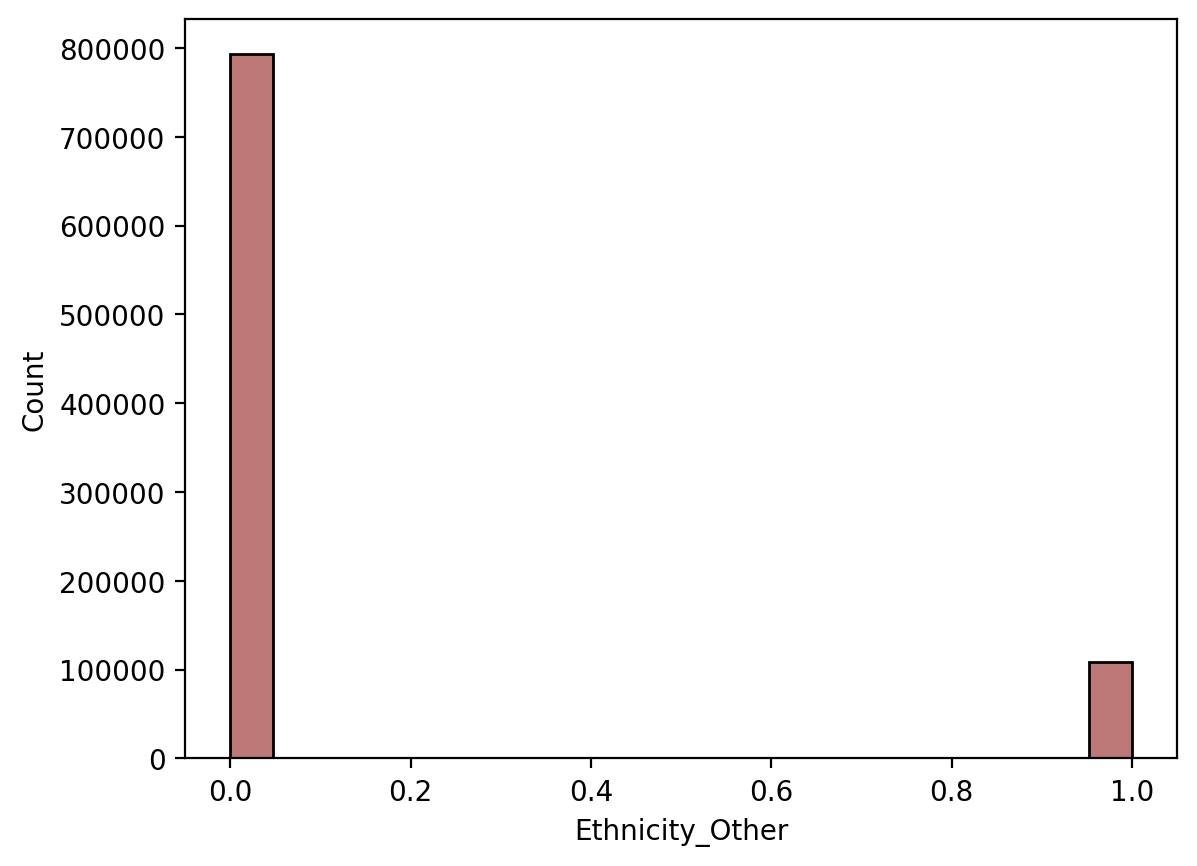

Ethnicity_White


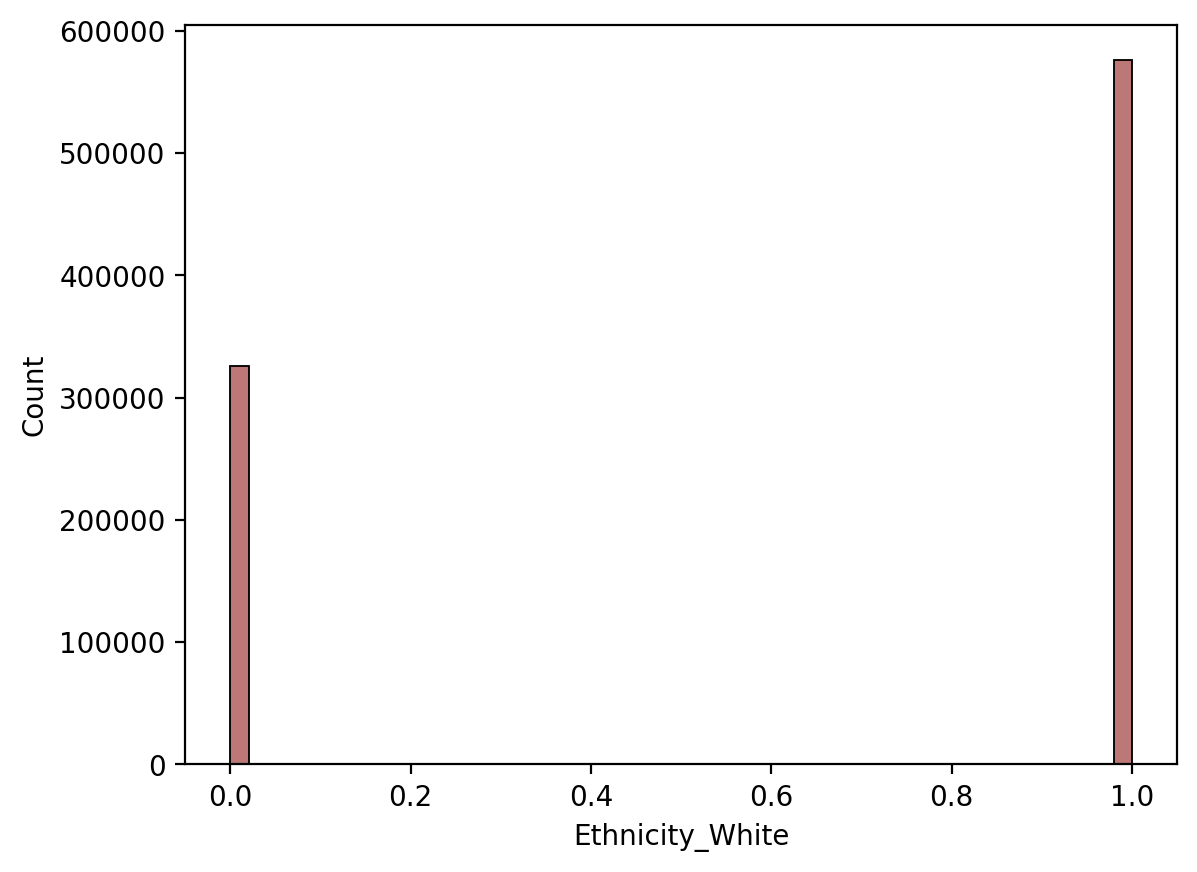

In [66]:
# Select columns with numeric data types
numeric_columns = data.select_dtypes(include=['number']).columns

# Convert to list
numeric_columns_list = numeric_columns.tolist()

for n in numeric_columns_list:
    print(n)
    sns.histplot(data=data, x=n, color='#a54b49')
    plt.show()

In [2]:
data = make_full_preprocess_data()

==== Preparing Global Disease Register + IMD2023 info ==========================
üíä ECS Disease Register completed  - ECS IMD2023 added
üíä TCP Disease Register completed  - TCP IMD2023 added
üíä TGP Disease Register completed  - TGP IMD2023 added
üíä SMW Disease Register completed  - SMW IMD2023 added
üíä KMC Disease Register completed  - KMC IMD2023 added
üíä HPVM Disease Register completed  - HPVM IMD2023 added
üîÇ Concat Registers
‚ùå Drop NaN
üíæ Saving to output_data/global_disease_register.csv...
‚úÖ Done in 7.54 sec (74420, 22)

==== Processing Appointments data + Add üå§Ô∏è + merge disease_register ===========
‚è∫Ô∏è ECS - df 1  df 2  df 3  df 4  df 5  df 6  df 7  df 8  df 9  duplicates: 0
‚è∫Ô∏è TCP - df 1  df 2  df 3  df 4  df 5  df 6  df 7  df 8  df 9  duplicates: 0
‚è∫Ô∏è TGP - df 1  df 2  df 3  df 4  df 5  df 6  df 7  df 8  df 9  duplicates: 0
‚è∫Ô∏è SMW - df 1  df 2  df 3  df 4  df 5  df 6  df 7  df 8  df 9  duplicates: 0
‚è∫Ô∏è KMC - df 1  df 2  df 3  df 4  df

In [60]:
from showupforhealth.params import *
from showupforhealth.ml_functions.data import *
from showupforhealth.ml_functions.preprocessor import *

In [63]:
data = pd.read_csv(f'{OUTPUT_DATA}full_preprocess_data.csv')

In [64]:
df = feature_engineering(data)
df.head()

=== Feature Engineering =============================================================
‚û°Ô∏è Rename Columns
‚û°Ô∏è Drop deseased and deducted
‚û°Ô∏è Columns to Datetime
‚û°Ô∏è Fix Appointment Time
‚û°Ô∏è Map Appointment Status
‚û°Ô∏è book_to_app_days
‚û°Ô∏è booked_by_clinician
‚û°Ô∏è Extract Rota Types
‚û°Ô∏è registered_for_months
‚û°Ô∏è Week
‚û°Ô∏è month
‚û°Ô∏è day of week
‚û°Ô∏è Convert Cyclical data
‚û°Ô∏è Adding NO Shows Column
‚û°Ô∏è Drop Column no longer needed
‚û°Ô∏è Rows dropped from Rotas other than spec: 6679
‚û°Ô∏è Rows from with Negative book_to_app_days: 323
‚û°Ô∏è Labelencode Column Sex
‚û°Ô∏è OneHotEncode Column Rota
‚û°Ô∏è Extract Ethnicity Category
‚û°Ô∏è OneHotEncode Ethnicity
üíæ Saving to output_data/full_train_data.csv...
‚úÖ Done in 17.89 sec (901516, 37)


Appointment_status  temp  precipitation  Age  Sex  FRAILTY  DEPRESSION  \
0                   1  17.7            0.0   40    0     0.00           0   
1                   1  18.5            0.0   70    2     0.39           0   
2                   1  18.5            0.0   70    2     0.39           0   
3                   1  19.4            0.0   66    2     0.03           1   
4                   1  18.3            0.0   58    0     0.11           0   

   OBESITY  IHD  DM  HPT  NDHG  SMI  IMD2023  dist_to_station  \
0        0    0   0    0     0    0  22698.0         0.519419   
1        1    0   1    1     0    0  10169.0         0.540792   
2        1    0   1    1     0    0  10169.0         0.540792   
3        0    0   0    1     0    0   8243.0         0.332691   
4        1    0   0    0     0    0   7626.0         0.155802   

   distance_to_surg  book_to_app_days  booked_by_clinician  \
0          0.816996              54.0                    1   
1          1.656309              49.0                    0   
2          1.656309              49.0                    0   
3          0.600495              37.0                    0   
4          0.215224              27.0                    0   

   registered_for_months  sin_week  cos_week  sin_Appointment_time  \
0                   17.0 -0.120537 -0.992709              0.707107   
1                   12.0 -0.120537 -0.992709              0.500000   
2                   12.0 -0.120537 -0.992709              0.500000   
3                   70.0 -0.120537 -0.992709              0.258819   
4                   28.0 -0.120537 -0.992709              0.707107   

   cos_Appointment_time  sin_month  cos_month  sin_day_of_week  \
0             -0.707107       -0.5  -0.866025         0.781831   
1             -0.866025       -0.5  -0.866025         0.781831   
2             -0.866025       -0.5  -0.866025         0.781831   
3             -0.965926       -0.5  -0.866025         0.433884   
4             -0.707107       -0.5  -0.866025         0.433884   

   cos_day_of_week  No_shows  Rota_ARRS  Rota_GP  Rota_HCA  Rota_Nurse  \
0         0.623490       2.0        0.0      0.0       0.0         1.0   
1         0.623490       2.0        0.0      0.0       0.0         1.0   
2         0.623490       2.0        0.0      0.0       0.0         1.0   
3        -0.900969      10.0        0.0      0.0       1.0         0.0   
4        -0.900969       0.0        0.0      0.0       0.0         1.0   

   Ethnicity_Asian  Ethnicity_Black  Ethnicity_Mixed  Ethnicity_Other  \
0              0.0              0.0              0.0              0.0   
1              1.0              0.0              0.0              0.0   
2              1.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              0.0              0.0              0.0   

   Ethnicity_White  
0              1.0  
1              0.0  
2              0.0  
3              1.0  
4              1.0

<Axes: xlabel='registered_for_months', ylabel='Count'>

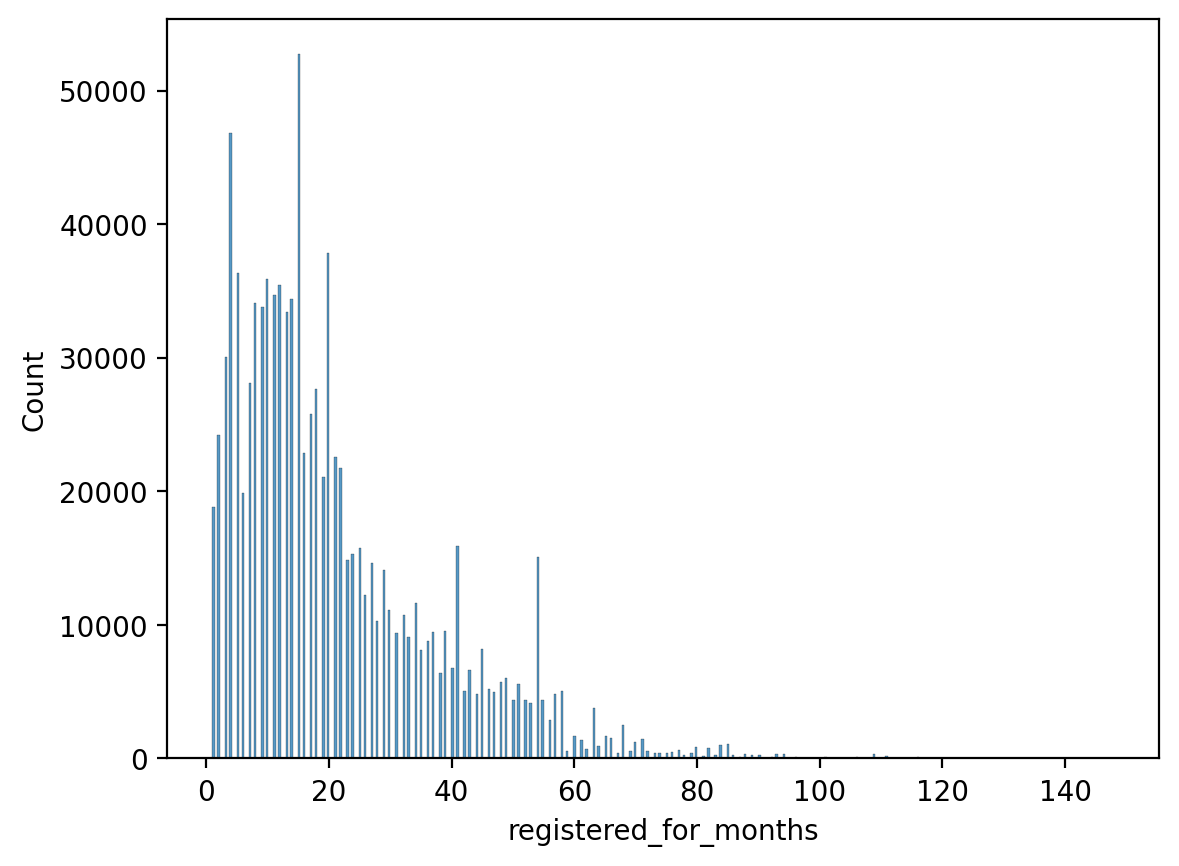

In [59]:

sns.histplot(df['registered_for_months'])

In [34]:
df.shape

(1018707, 40)